<a href="https://colab.research.google.com/github/helenaglaring/AIML/blob/main/AIML_drug_review_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

## Business Understanding 
- Describe the problem and the goal of the project
- Explain why sentiment analysis is important for drug reviews
- Define the evaluation metrics (e.g. accuracy, precision, recall, F1 score)

## Data Understanding
- Load the dataset and inspect its features and target variable
- Check for missing values, duplicates, and class imbalance
- Explore the distribution of the target variable (positive/negative reviews)
- Visualize the data (e.g. word clouds, histograms, box plots) to gain insights about the text and its characteristics

## Preprocessing
- Define a preprocessing pipeline that includes tokenization, stemming, and stop word removal
- Apply the pipeline to the text data
- Convert the text data into numerical data using a suitable embedding method (e.g. TF-IDF, Word2Vec, BERT)

## Modeling
- Define a set of candidate models (e.g. Logistic Regression, Naive Bayes, SVM, Random Forest, BERT)
- Baseline models Dummy Classifier
- Set up a pipeline that combines the preprocessing pipeline with a classifier
- Use grid search to find the best hyperparameters for each model
- Train each model on the training data and evaluate its performance on the validation data

## Evaluation
- Select the best performing model based on the evaluation metrics
- Test the selected model on the test data and report its performance
- Analyze the errors made by the model and suggest ways to improve it
- Discuss the limitations and potential biases of the model

For this task, relevant models to consider include logistic regression, naive Bayes, SVM, random forest, and BERT. You can compare their performance using the evaluation metrics you defined earlier. 

It's worth noting that BERT is a state-of-the-art model for NLP tasks, and it may require a different preprocessing pipeline than the other models. You might consider fine-tuning a pre-trained BERT model using transfer learning, which can improve its performance on your specific task.



```
# Dette formateres som kode
```

# Library Dependencies

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pandas-profiling
!pip install wordcloud
!pip install plotly
!pip install scikit-learn
!pip install bs4
!pip install nltk
!pip install spacy
!pip install imbalanced-learn
!pip install tensorflow
!pip install tensorflow_hub
!pip install tensorflow_text
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.9 MB/s eta 0:00:00
  Preparing metadata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=6a7353cc6976bc858d9fffb025a55eac1ba72d44550ca1cb088126b0b957c77e
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/s

In [ ]:
# Importing packages and libraries

# core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from ydata_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

# preprocessing
from imblearn.under_sampling import RandomUnderSampler
import re # Text cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from sklearn.preprocessing import LabelEncoder
import string
import spacy


# models
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# embeddings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer

# metrics and evaluation
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# BERT
from transformers import AutoTokenizer, AutoModel
import tensorflow as tf
import tensorflow.compat.v1 as tf1
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Concatenate
from tensorflow.feature_column import categorical_column_with_vocabulary_list, embedding_column
from tensorflow import feature_column
from tensorflow.keras import layers
# TensorFlow and tf.keras

# from keras.utils.vis_utils import plot_model

import warnings
#  Turning off  warnings as  RandomSearchCV() tends to generate quite many of warnings.
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')


# Business Understanding

The original data is divided in a train (75%) and a test (25%) set (see publication) and stored in two .csv files, respectively. 

# Data Understanding

In [ ]:
# Import datasets
df_train = pd.read_csv("drugs_review_train.csv")    # training set
df_test = pd.read_csv("drugs_review_test.csv")      # test set

# Print shape of train and test set
print ("Shape of train set: ", df_train.shape)
print ("Shape of test set: ", df_test.shape)

Shape of train set:  (161297, 7)
Shape of test set:  (53766, 7)


In [ ]:
# Show the first few rows of the train set
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# Show the first few rows of the test set
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
# Check if train and test have same features
list(df_train) == list(df_test)

True

- The train and test set have the same attributes

In [ ]:
# Checking the train-test ratio
df_train.values.shape[0], df_test.values.shape[0], 
print("Percentage by which the training set is larger than the test set: {:.2f} %".format(df_train.values.shape[0] / df_test.values.shape[0]))

Percentage by which the training set is larger than the test set: 3.00 %


- The training set is approx. 3 times as big as the test set, meaning that this is a typical 75:25 train:test split.

## Exploratory Data Analysis (EDA)
- Sources:
    - https://www.kaggle.com/code/sumitm004/eda-and-sentiment-analysis#Feature-Engineering - merged
    - https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook - only EDA


We will merge the train and test data set for EDA and some of the preprocessing, and later on split the dataset for training and testing.

In [ ]:
# Merging test and train data set into new dataframe
merge = [df_train, df_test]
df = pd.concat(merge)

print (df.shape)

df.head(10)

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


- We see that there are missing (null) values in the `condition` attribute, which will be addressed later in preprocessing
- This indicates that some people might not know their condition by name or due to privacy concerns don't want to share it

### Profile Report
- Source: https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/

In [ ]:
profile_report = ProfileReport(
    df, 
    title = "EDA - Drug Review Dataset",
    sort = None,
    html = { 
            "style": {
                "full_width": True
                }
            }, 

    progress_bar = True, 
    explorative = True,
    variables = {
        "descriptions": {
            "drugName": "Name of the drug (categorical)",
            "condition": "Name of condition (categorical)",
            "review": "Patient review (text)",
            "rating": "10 star patient rating (numerical)",
            "date": "Date of review entry (date)",
            "usefulCount": "Number of users who found review useful (numerical)",
        }
    }
)

In [ ]:
# Render profile report in notebook
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- **Observation:**
    - 3 numeric variables: `uniqueID`, `rating`, `usefulCount`
    - 4 categorical variables: `condition`, `drugName`, `review`, `date`

### Total number of drugs

In [ ]:
# Determining total number of unique drugs
drugs_total = len(df['drugName'].unique().tolist())
print('Total number of drugs: ',drugs_total)

Total number of drugs:  3671


### Most frequently used drugs

In [ ]:
# Top 20 most frequently used drugs
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Implanon                              1506
Gabapentin                            1415
Bupropion                             1369
Miconazole                            1344
Venlafaxine                           1338
Medroxyprogesterone                   1308
Citalopram                            1308
Duloxetine                            1256
Lexapro                               1250
Bupropion / naltrexone                1249
Name: drugName, dtype: int64

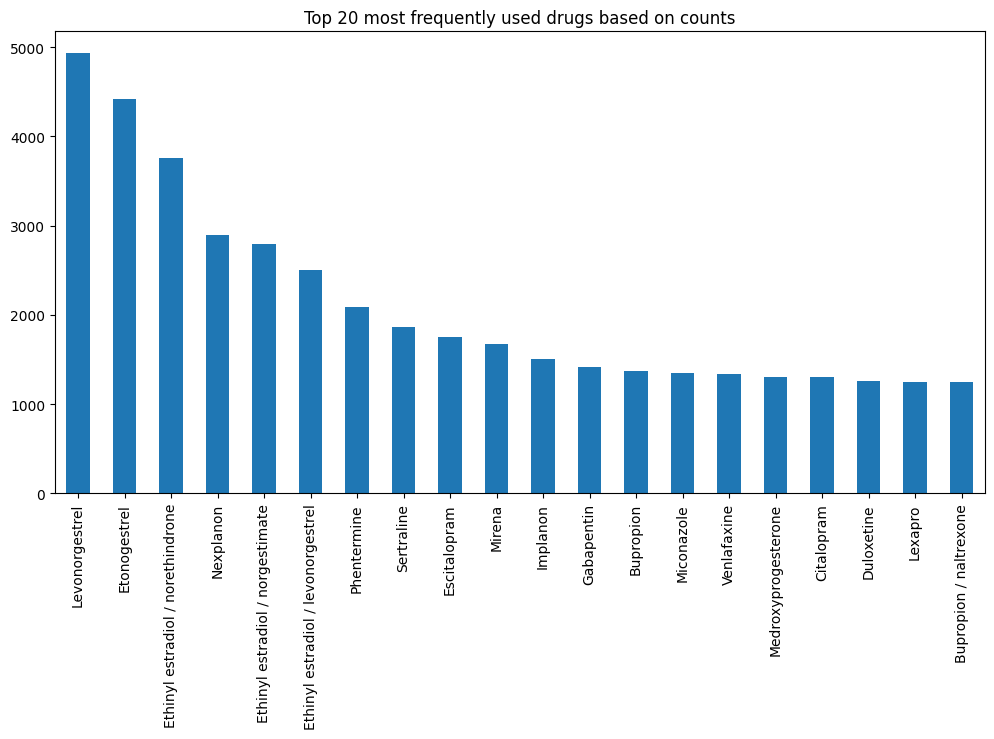

In [ ]:
# Plotting top 20 most frequently used drugs
plt.figure(figsize=(12,6))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 most frequently used drugs based on counts")
plt.show()

- **Observation:** The list contains a mix of birth control methods and medications for mental health conditions.

#### Most frequently used drugs with 10/10 rating
- Source: https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook

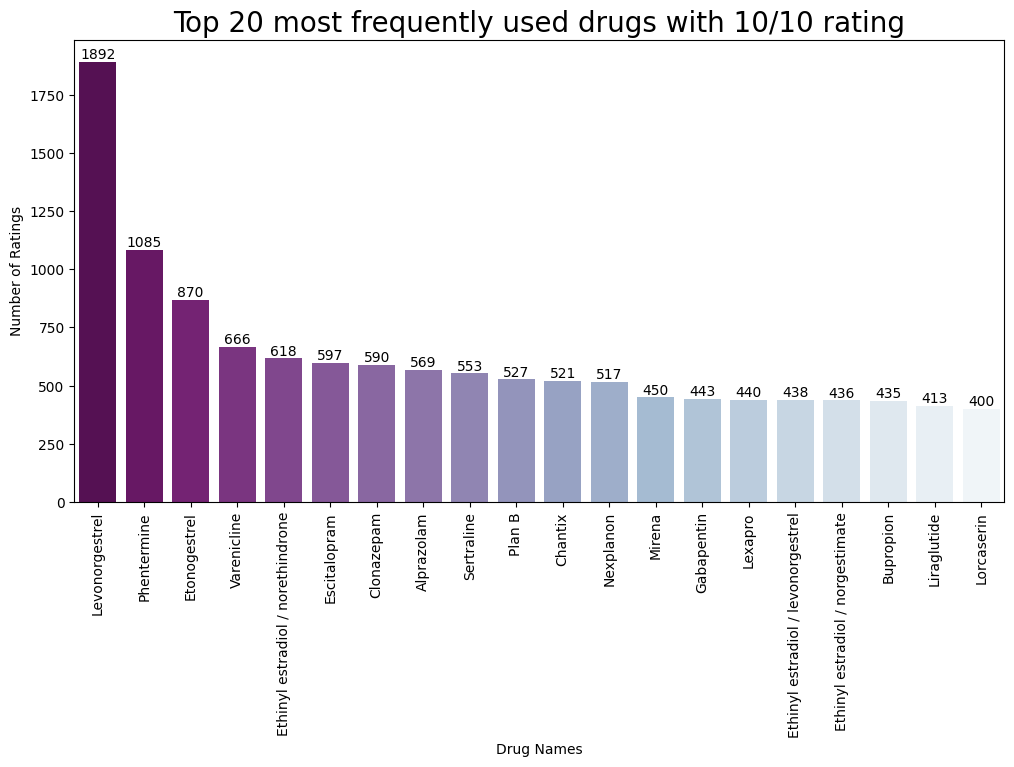

In [ ]:
# Set figure size
plt.figure(figsize=(12,6))

# Count the number of drug ratings that are rated 10 and create a dictionary with drug names and their counts
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())

# Extract drug names and their corresponding ratings from the dictionary
drug_name = list(rating.keys())
drug_rating = list(rating.values())

# Create a barplot of the top 20 drugs with 10/10 rating
plt_rating = sns.barplot(x = drug_name[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

# Add the count of each drug as a label to the bars in the plot
for i in plt_rating.containers:
    plt_rating.bar_label(i,)

# Set the title, x-axis label, and y-axis label of the plot
plt_rating.set_title('Top 20 most frequently used drugs with 10/10 rating', fontsize=20)
plt_rating.set_ylabel("Number of Ratings")
plt_rating.set_xlabel("Drug Names")

# Rotate the x-axis labels to prevent overlapping
plt.setp(plt_rating.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

#### Most frequently used drugs with 1/10 rating

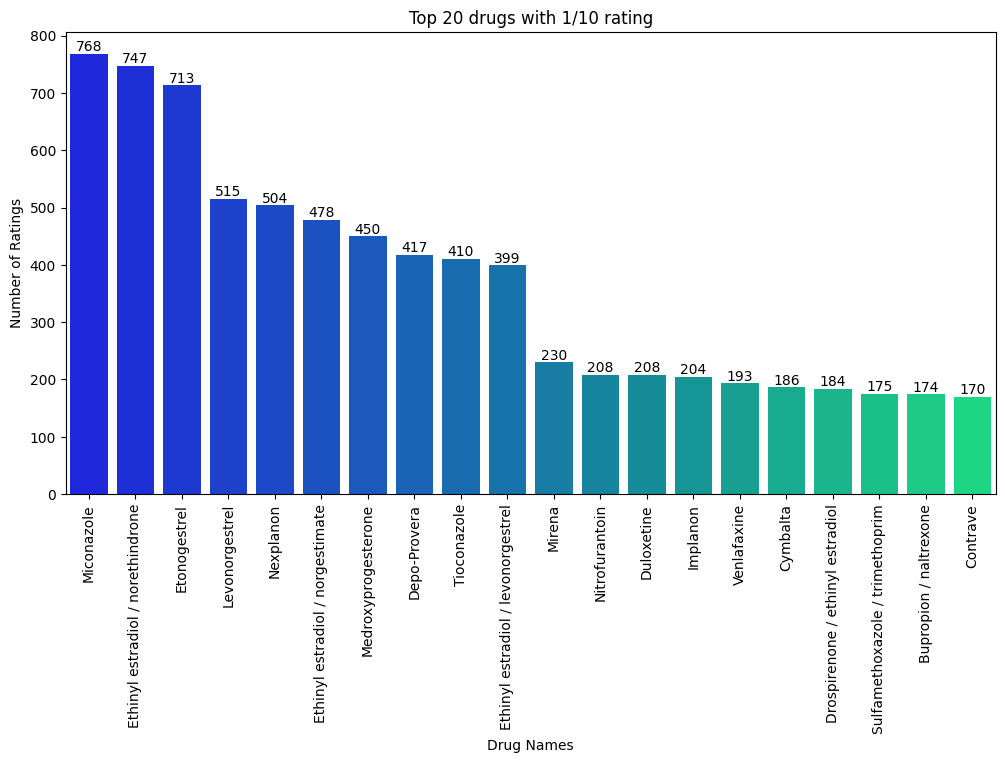

In [ ]:
# Plotting 20 most frequently used drugs with 1/10 rating
plt.figure(figsize=(12,6))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drug_name = list(rating.keys())
drug_rating = list(rating.values())

plt_rating = sns.barplot(x = drug_name[0:20], y = drug_rating[0:20], palette = 'winter')

for i in plt_rating.containers:
    plt_rating.bar_label(i,)

plt_rating.set_title('Top 20 drugs with 1/10 rating')
plt_rating.set_ylabel("Number of Ratings")
plt_rating.set_xlabel("Drug Names")
plt.setp(plt_rating.get_xticklabels(), rotation=90)
plt.show()

### Distribution of ratings

ValueError: ignored

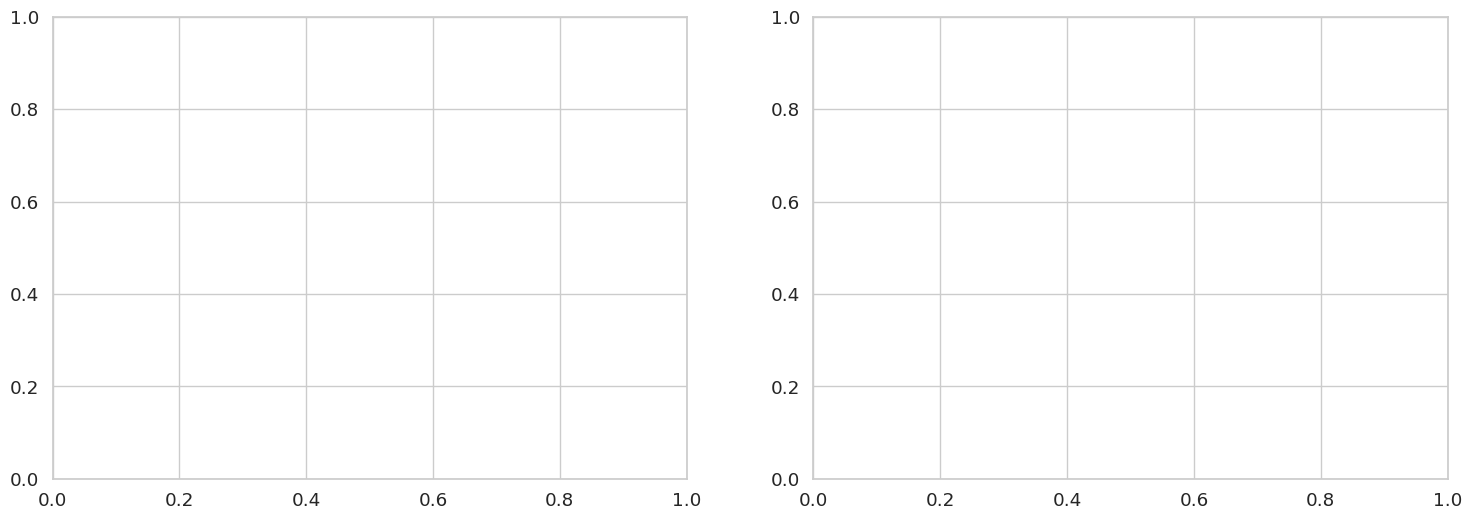

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings

# Figure size and style
plt.rcParams['figure.figsize'] = [18,6]
sns.set(font_scale = 1.2, style = 'whitegrid')

# Creating subplots with two plots side by side
fig, ax = plt.subplots(1, 2)

# Creating count plot of ratings with specific order and color palette
plt_1 = sns.countplot(df['rating'], order = list(range(1, 10)), ax = ax[0])

# Histogram plot of ratings
plt_2 = sns.distplot(df['rating'], ax = ax[1])

# titles and labels for each plot
plt_1.set_title('Count of Ratings')
plt_1.set_xlabel("Rating")
plt_2.set_title('Distribution of Ratings')
plt_2.set_xlabel("Rating")


Text(0.5, 0, 'Rating')

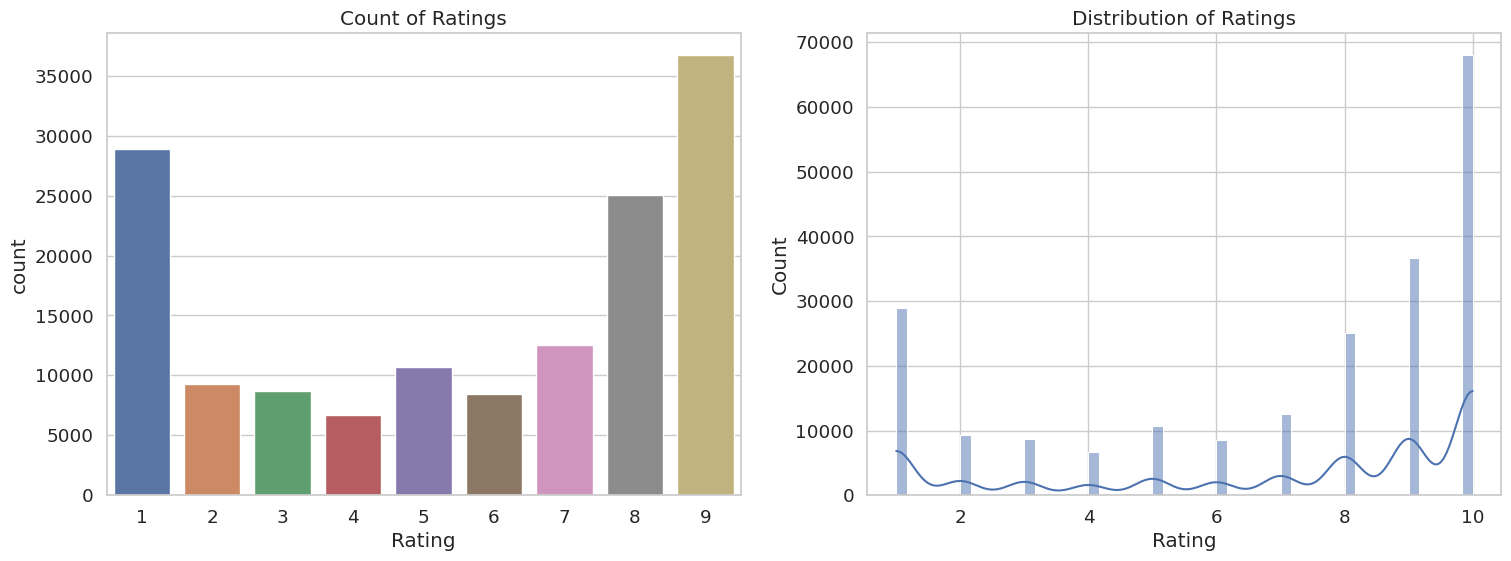

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings

# Figure size and style
plt.rcParams['figure.figsize'] = [18,6]
sns.set(font_scale = 1.2, style = 'whitegrid')

# Creating subplots with two plots side by side
fig, ax = plt.subplots(1, 2)

# Creating count plot of ratings with specific order and color palette
plt_1 = sns.countplot(x=df['rating'], order = list(range(1, 10)), ax = ax[0])

# Histogram plot of ratings
plt_2 = sns.histplot(x=df['rating'], ax = ax[1], kde=True)

# titles and labels for each plot
plt_1.set_title('Count of Ratings')
plt_1.set_xlabel("Rating")
plt_2.set_title('Distribution of Ratings')
plt_2.set_xlabel("Rating")


- **Observation:** We can see that most ratings are at the extremes (0 and 10). The distribution indicates that people might be more likely to review drugs they are either very satisfied or dissatisfied with. We see fewer ratings in the middle in comparison to extreme ratings.

### Average Rating of Drugs

In [ ]:
# Calculating the average rating of all types of drugs
avg_drug_rating = (df['rating'].groupby(df['drugName']).mean())
avg_drug_rating

# source: https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.414286
Abacavir / lamivudine                   10.000000
Abacavir / lamivudine / zidovudine       9.000000
                                          ...    
ZzzQuil                                  2.000000
depo-subQ provera 104                    5.500000
ella                                     7.183099
femhrt                                   6.500000
pHisoHex                                10.000000
Name: rating, Length: 3671, dtype: float64

Text(0, 0.5, 'Count of Drug Types')

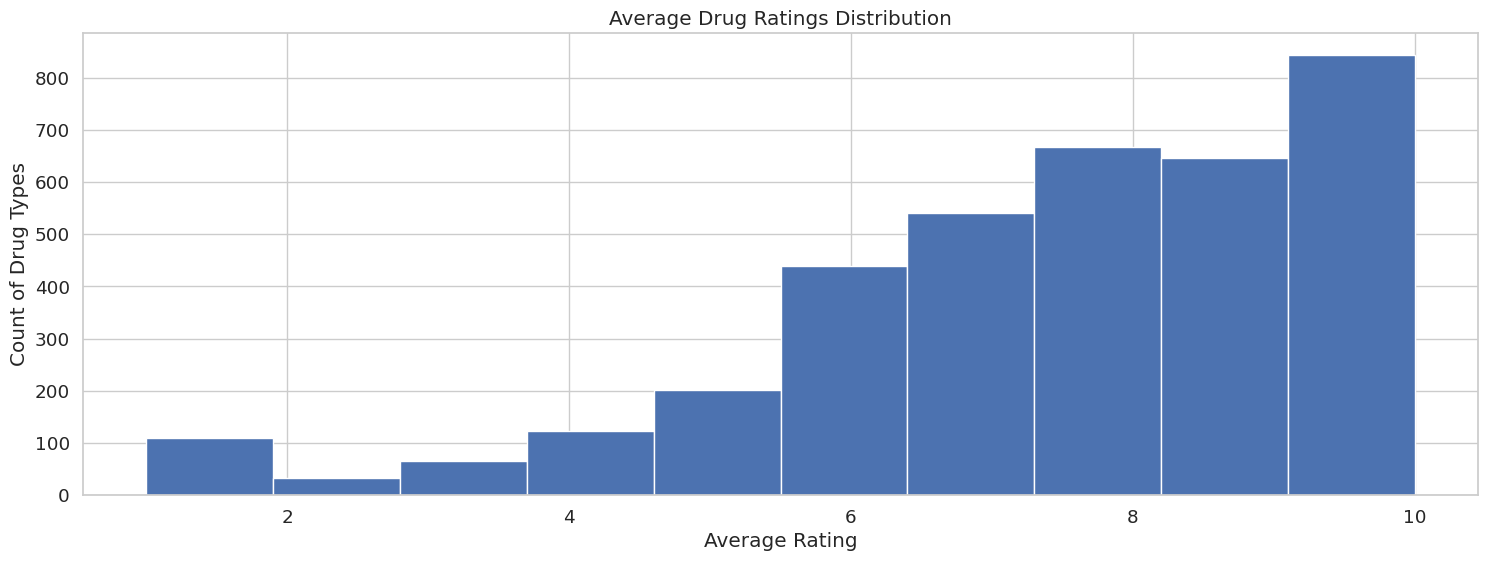

In [ ]:
avg_drug_rating.hist()
plt.title('Average Drug Ratings Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count of Drug Types')

# Source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

- **Observation:** Most patients have given ratings between 6 and 10.

### Average Rating of Drugs for Each Condition

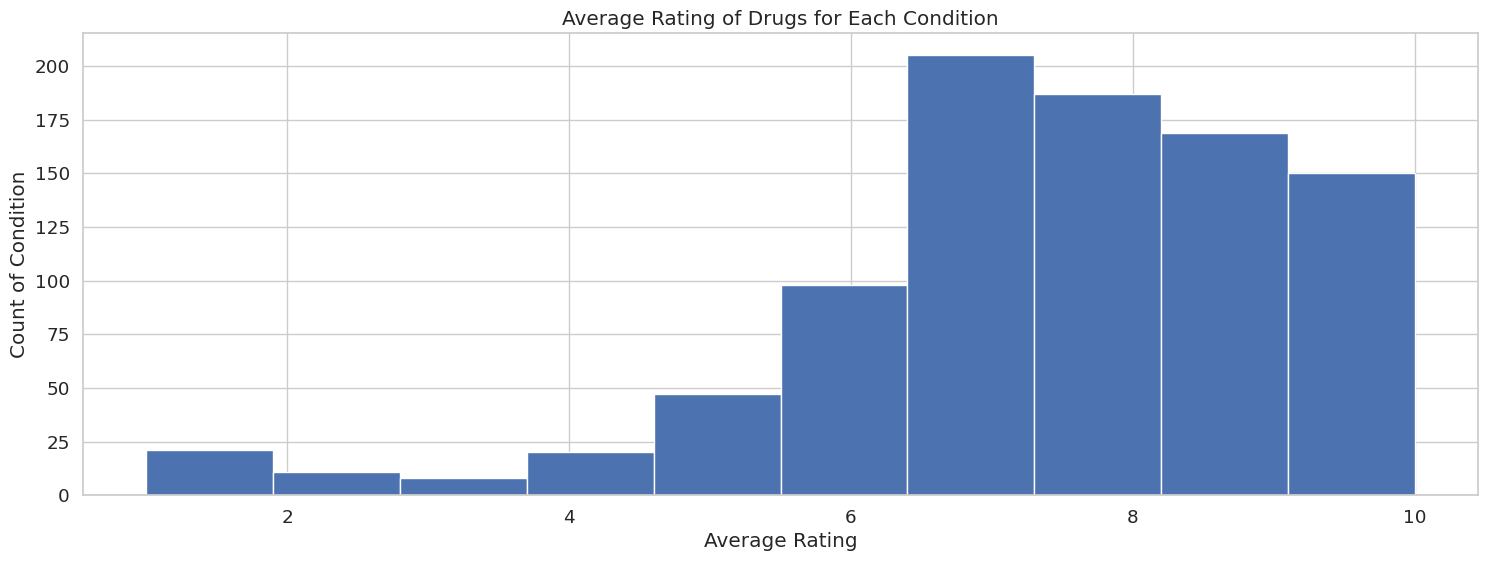

In [ ]:
avg_drug_rating_cond = (df['rating'].groupby(df['condition']).mean())
avg_drug_rating_cond.hist()
plt.title('Average Rating of Drugs for Each Condition')
plt.xlabel('Average Rating')
plt.ylabel('Count of Condition')
plt.show()

### Conditions

In [ ]:
# Total number of conditions
print("Total number of different conditions: {}".format(len(df['condition'].unique().tolist())))

Total number of different conditions: 917


- **Observation:** 917 different conditions present

#### Common conditions

In [ ]:
# Sorting conditions by count
conditions = df.condition.value_counts().sort_values(ascending=False)
# Top 10 most common conditions
conditions[:10]

# Source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

Text(0, 0.5, 'Count')

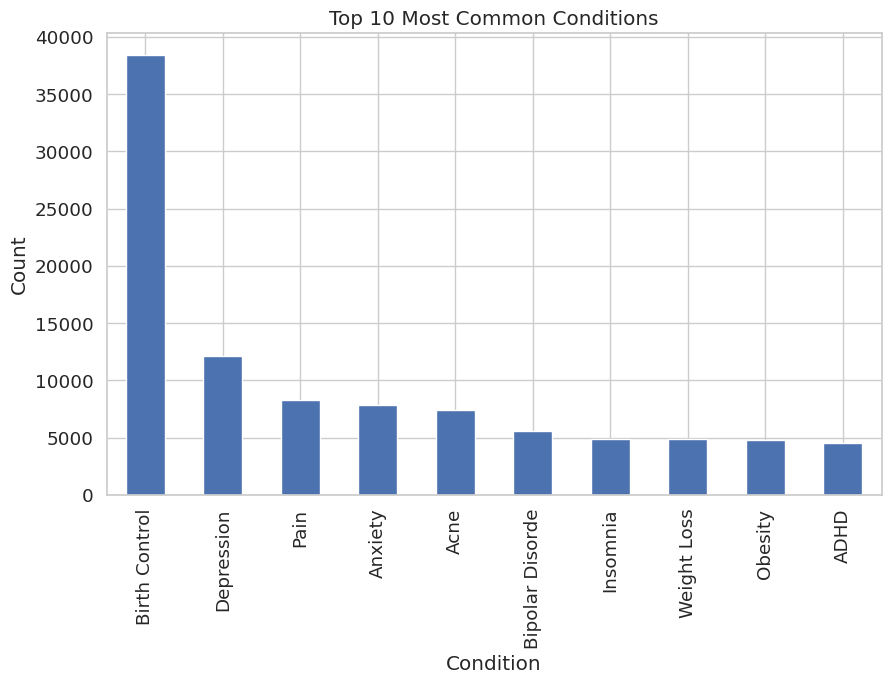

In [ ]:
# Plotting most common conditions
plt.rcParams['figure.figsize'] = [10, 6]
conditions[:10].plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

#### Least common conditions

In [ ]:
df['condition'].value_counts().nsmallest(20)

Gastric Cance                                   1
95</span> users found this comment helpful.     1
121</span> users found this comment helpful.    1
61</span> users found this comment helpful.     1
Q Feve                                          1
Diagnostic Bronchograms                         1
Asystole                                        1
Neoplastic Diseases                             1
Short Stature                                   1
Hypercalcemia                                   1
146</span> users found this comment helpful.    1
Neuritis                                        1
ungal Infection Prophylaxis                     1
Rabies Prophylaxis                              1
Linear IgA Disease                              1
Somat                                           1
Pertussis Prophylaxis                           1
38</span> users found this comment helpful.     1
135</span> users found this comment helpful.    1
Steroid Responsive Inflammatory Conditions      1


- **Observation:** We see that the phrase "3\</span> users found this comment helpful" appears in the condition-column, which probably is an error. We will look into this in more detail below.

In [ ]:
# Finding entries in the condition-column with the error
df[df['condition']=='3</span> users found this comment helpful.'].head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
1864,124318,Skyla,3</span> users found this comment helpful.,"""Never pregnant,28,retroverted small (6cm) ute...",1,16-Dec-15,3
3322,202848,ProAir HFA,3</span> users found this comment helpful.,"""I get chest colds and asthmatic symptoms in t...",9,12-Dec-15,3
6355,195303,Low-Ogestrel-21,3</span> users found this comment helpful.,"""After taking it for two months I noticed some...",8,16-May-11,3
6968,230747,Tazorac,3</span> users found this comment helpful.,"""Started this 11 weeks ago. I am so so sad rig...",2,31-May-16,3


- We see that the phrase '</ span> users found this comment helpful.' occurs multiple times, and there are probably more instances with this error. We will address these instances in the preprocessing.

### Drugs per condition

Text(0.5, 1.0, 'Number of drugs per condition (Top 20)')

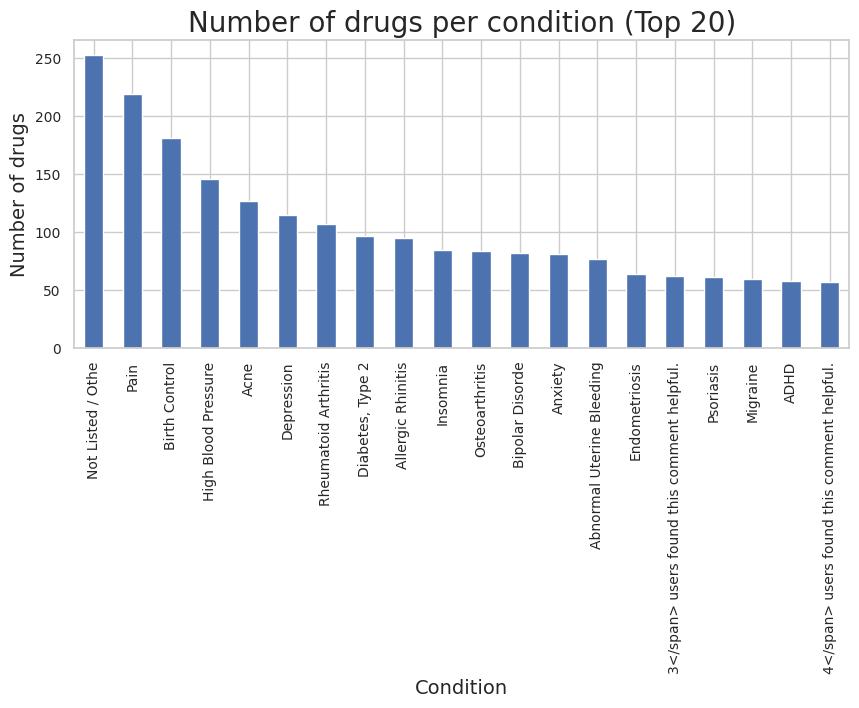

In [ ]:
# Group dataframe by 'condition' and count the number of unique drugs per condition,  sort in descending order
drugs_per_condition = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

drugs_per_condition[0:20].plot(kind="bar", figsize = (10,4), fontsize = 10)
plt.xlabel("Condition", fontsize = 14)
plt.ylabel("Number of drugs", fontsize = 14)
plt.title("Number of drugs per condition (Top 20)", fontsize = 20)

# Source: https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook

### Usefulness and Rating
Exploring whether rating is correlated with usefulness of the review.

([<matplotlib.axis.XTick at 0x7f770073ff40>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

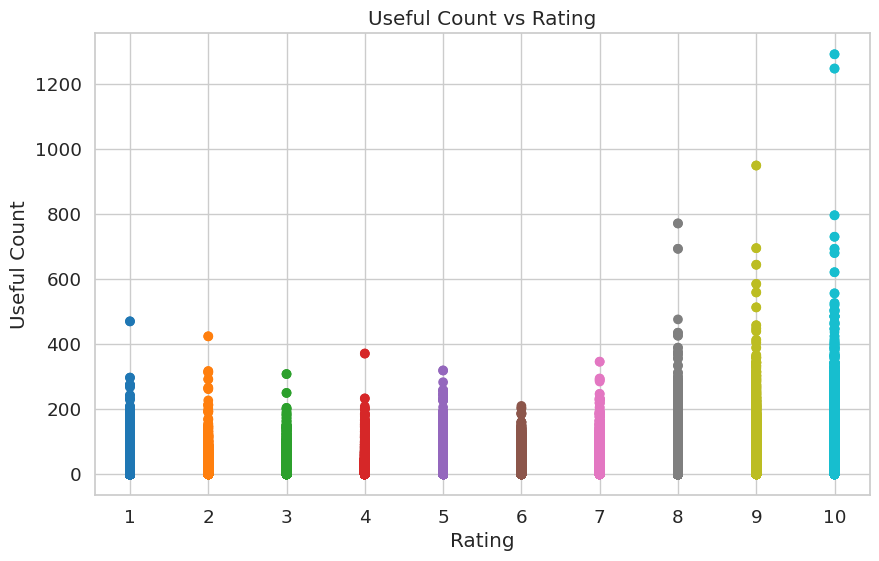

In [ ]:
# Creating scatter plot to illustrate relation between ratings and useful count
plt.scatter(df.rating, df.usefulCount, c=df.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)])

# Source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

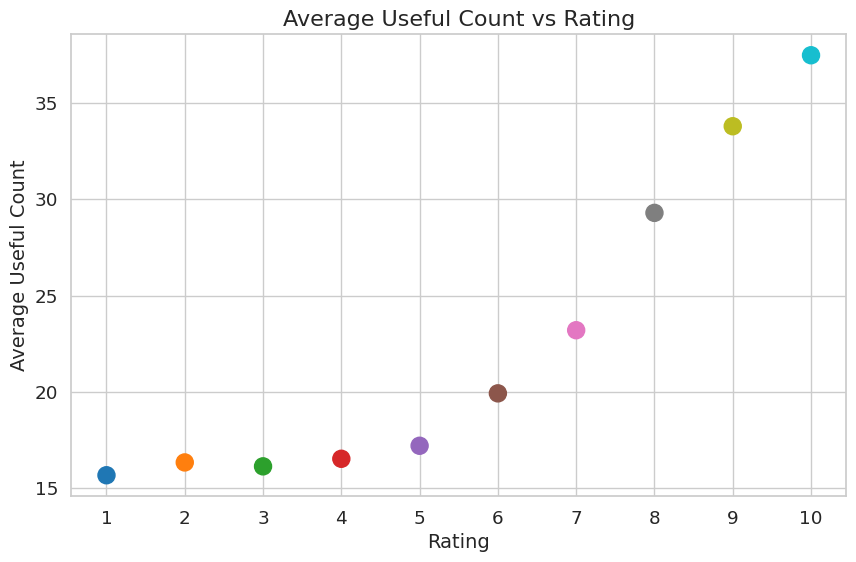

In [ ]:
# Empty list to hold the rating and average usefulness for each rating
avg_usefulness_ls = []
# Iterate through the ratings 1-10
for i in range(1, 11):
    # Calculate avg. usefulness for reviews with given rating
    avg_usefulness = np.sum(df[df.rating == i].usefulCount) / np.sum([df.rating == i])
    # Append the rating and average usefulness to the list
    avg_usefulness_ls.append([i, avg_usefulness])
# Convert list to a numpy array for plotting
avg_usefulness_arr = np.asarray(avg_usefulness_ls)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=avg_usefulness_arr[:, 0], y=avg_usefulness_arr[:, 1], c=avg_usefulness_arr[:, 0], cmap='tab10', s=150)
plt.title('Average Useful Count vs Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Average Useful Count', fontsize=14)
plt.xticks(np.arange(1, 11))
plt.show()

# source: https://www.kaggle.com/code/neilash/team-ndl-algorithms-and-illnesses/notebook#Machine-Learning-Models

- **Observation:** It appears that reviews with higher scores received more 'useful' tags compared to reviews with lower ratings, indicating that people found reviews with higher ratings to be more useful.

### Correlation matrix

[None, None, None, None, None, None]

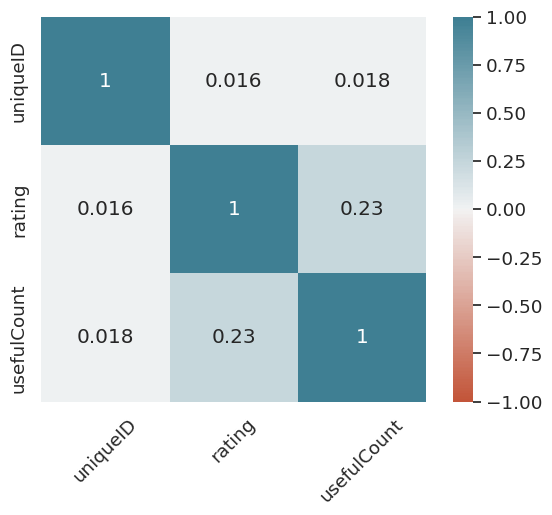

In [ ]:
# Heatmap of correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.setp(sns_heat.get_xticklabels(), rotation = 45)

- **Observation:**  
    - *uniqueID* is not highly correlated with either rating or usefulCount - This attribute will be removed in preprocessing. 
    - We see some form of correlation between *rating* and *usefulCount*, which confirms the above diagrams showing that there is a pattern that higher reviews get higher usefulCounts. 

### Reviews

#### Character and word count

##### Reviews with rating 1-5

In [ ]:
# Select reviews with rating 1-5
df_1_5 = df[df["rating"].isin([1, 2, 3, 4, 5])]

# Calculate average character length and word count
avg_char_length = df_1_5["review"].str.len().mean()
avg_word_count = df_1_5["review"].str.split().str.len().mean()

print("Average character length of reviews with rating 1-5: {:.2f}".format(avg_char_length))
print("Average word count of reviews with rating 1-5: {:.2f}".format(avg_word_count))

Average character length of reviews with rating 1-5: 448.33
Average word count of reviews with rating 1-5: 82.50


##### Reviews with rating 6-10

In [ ]:
# Select reviews with rating 6-10
df_6_10 = df[df["rating"].isin([6, 7, 8, 9, 10])]

# Calculate average character length and word count
avg_char_length = df_6_10["review"].str.len().mean()
avg_word_count = df_6_10["review"].str.split().str.len().mean()

print("Average character length of reviews with rating 6-10: {:.2f}".format(avg_char_length))
print("Average word count of reviews with rating 6-10: {:.2f}".format(avg_word_count))

Average character length of reviews with rating 6-10: 463.01
Average word count of reviews with rating 6-10: 85.61


##### Average word counts for reviews for each rating

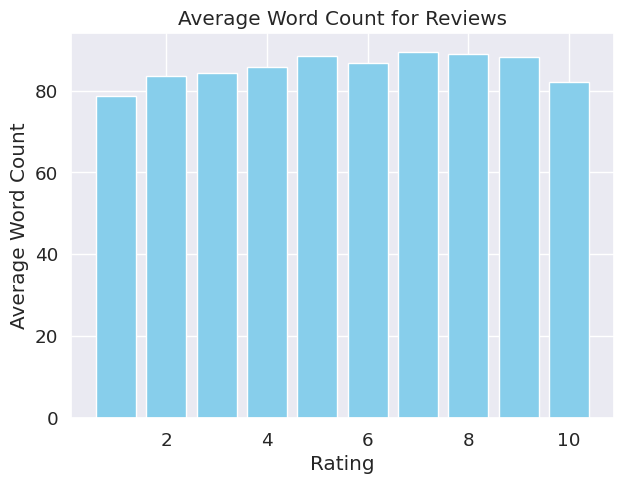

In [ ]:
# Calculate the average word count for each rating
avg_wordcount = df.groupby('rating')['review'].apply(lambda x: x.str.split().str.len().mean()).reset_index()

# Create a bar plot
plt.bar(avg_wordcount['rating'], avg_wordcount['review'], color='skyblue')
plt.title('Average Word Count for Reviews')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.show()

##### Average character count for reviews for each rating

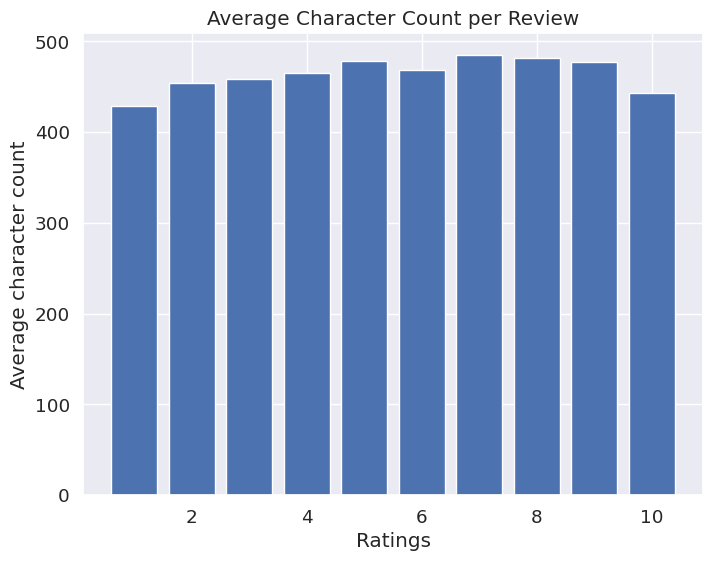

In [ ]:
# Calculate the average character count for each review
avg_char_count = df.groupby('rating')['review'].apply(lambda x: x.str.len().mean())

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(avg_char_count.index, avg_char_count.values)
ax.set_xlabel('Ratings')
ax.set_ylabel('Average character count')
ax.set_title('Average Character Count per Review')
plt.show()

#### Wordclouds
##### Wordcloud of Reviews with Rating of 10

(-0.5, 799.5, 399.5, -0.5)

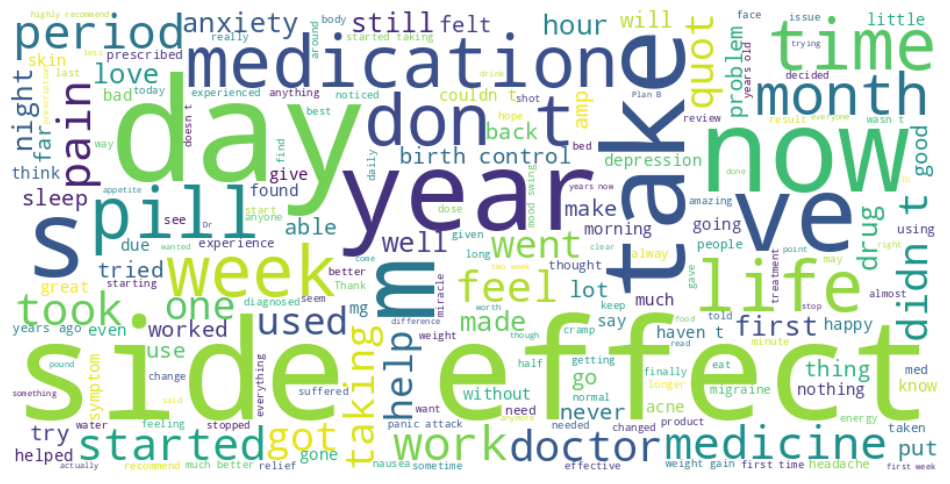

In [ ]:
# Visualizing word cloud of reviews with a rating of 10
df_ten_rating = df.loc[df.rating == 10, 'review']
txt = (' '.join(df_ten_rating))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white',stopwords = stopwords).generate(txt)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

##### Wordcloud of Reviews with Rating of 1

(-0.5, 799.5, 399.5, -0.5)

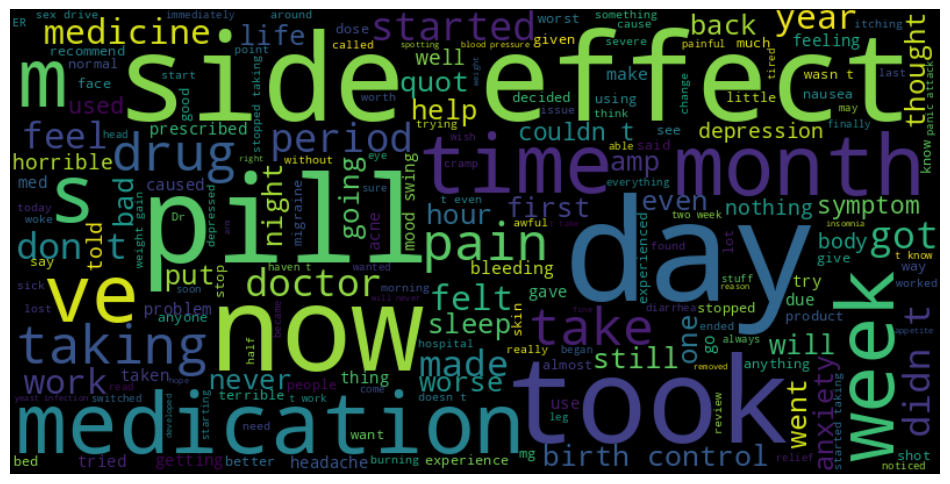

In [ ]:
# Visualizing word cloud of reviews with a rating of 1
df_one_rating = df.loc[df.rating == 1, 'review']
txt2 = (' '.join(df_one_rating))

wordcloud = WordCloud(width = 800, height = 400, stopwords = stopwords).generate(txt2)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

#### N-grams

We will classify drug ratings 1 to 5 as negative and 6 to 10 as positive. Now we will analyze the effectiveness of 1 to 4 n-grams to identify the sentiment expressed in the text corpus.

In [ ]:
# Creating two dataframes with ratings from 1-5 and 6-10 respectively
df_rating_1_5 = df[df["rating"]<6]
df_rating_6_10 = df[df["rating"]>5]


In [ ]:
# Function for generating ngrams
def generate_ngrams(text, n_gram=1):
    # Tokenizing text by splitting it into individual words and removing any stop words
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    # Generating n-grams from the list of tokens using a zip function, which aggregates elements from each of the input lists
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    #  Return output list with all possible n-grams of the specified size (n_gram)
    return [" ".join(ngram) for ngram in ngrams]

## Function for bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        # set y-axis labels as the words in the df, in reverse order
        y=df["word"].values[::-1], 
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    # return the trace object for the chart
    return trace

## Function for creating trace object for ngram
def plot_ngram(df, n_gram, color):
    freq_dict = defaultdict(int)
    for sentence in df["review"]:
        for word in generate_ngrams(sentence, n_gram):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace = horizontal_bar_chart(fd_sorted.head(30), color)
    return trace

## Function for making subplots
def make_subplots(trace1, trace2, ngram):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.03,
                          subplot_titles=[f"Top 30 {ngram} according for rating 1-5", 
                                          f"Top 30 {ngram} according for rating 6-10"])
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig['layout'].update(height=600, width=1500, paper_bgcolor='rgb(233,233,233)', title=f"{ngram} Count Plots")
    return py.iplot(fig, filename='word-plots')

# source: https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook

#### Unigrams


In [ ]:
trace_1_5 = plot_ngram(df_rating_1_5, 1, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 1, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Unigram")

- **Observation:** If we analyze the text using 1-gram, we can observe that the top 5 words have similar content, although their order differs for negative and positive sentiments. This implies that analyzing text with a single corpus may not classify emotions effectively, hence we need to expand the corpus.

#### Bigrams

In [ ]:
trace_1_5 = plot_ngram(df_rating_1_5, 2, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 2, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Bigram")

- **Observation:** 
    - Similarly, for 2-grams, the top five corpus contain similar content, making it difficult to classify as positive or negative. 
    - Moreover, there is a difference in interpretation between 'side effects' and 'side effects.', indicating the need for pre-processing of review data. 
    - Nonetheless, it is evident that using 2-grams provides better emotional classification compared to the previous 1-grams, as exemplified by phrases like 'side effects', 'weight gain', and 'highly recommend'.

#### Trigrams

In [ ]:
trace_1_5 = plot_ngram(df_rating_1_5, 3, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 3, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Trigram")

- **Observation**
    - The 3-gram analysis shows a distinction between positive and negative corpus.
    - The following corpus were identified as classifiers for positive and negative: Bad side effects, birth control pills, negative side effects.
    - However, positive and negative parts may have missing parts that can reverse the context, such as the word 'not' in front of a corpus.

#### Fourgrams

In [ ]:
trace_1_5 = plot_ngram(df_rating_1_5, 4, 'red')
trace_6_10 = plot_ngram(df_rating_6_10, 4, 'green')

# Creating subplots
make_subplots(trace_1_5, trace_6_10, "Fourgram")

- **Observation:** 
    - Using 4-gram significantly improves emotion classification compared to other n-grams.
    - This indicates that it might be optimal ti utilize 4-gram to construct our models

### Date

#### Conversion of date attribute

In [ ]:
# Converting entries in 'date'-column into date-time format 
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# Extracting year from date creating 'year' attribute
df['year'] = df['date'].dt.year

# Extracting month from date, creating 'month' attribute 
df['month'] = df['date'].dt.month

# Extracting day from the date creating 'day' attribute
df['day'] = df['date'].dt.day


In [ ]:
# Checking for NaN in 'date' column
df[df['date'].isna()]

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day


#### Number of Reviews for Each Year

In [ ]:
# Making a plot for number of reviews based on 'year'
plt.rcParams['figure.figsize'] = (12, 6)
sns_=sns.countplot(df['year'])

# add labels to bar
for i in sns_.containers:
    sns_.bar_label(i,)
    
plt.title('Number of Reviews for Each Year', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count of Reviews', fontsize = 14)
plt.show()

ValueError: ignored

#### Number of Reviews for Each Month

In [ ]:
# Making a plot for number of reviews based on 'month'
plt.rcParams['figure.figsize'] = (12, 6)
sns_=sns.countplot(df['month'])

for i in sns_.containers:
    sns_.bar_label(i,)

plt.title('Number of Reviews for each Month', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Count of Reviews', fontsize = 14)
plt.show()

ValueError: ignored

#### Number of Reviews for each Day

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns_=sns.countplot(df['day'])

plt.title('Number of Reviews for each Day', fontsize = 16)
plt.xlabel('Day', fontsize = 14)
plt.ylabel('Count of Reviews', fontsize = 14)
plt.show()

# Data Preprocessing

Entire:
- Target variable (sentiment label)
- Missing value
- Data clearning
    - Remove uniqueID
    - Convert date 
    - Remove span
- Encoding categorical to numerical
- Text preprocessing 
    - Stemming, Stop word removal, tokenization

We will perform some of the preprocessing steps only on the training set to prevent bias and data leakage from the test set.
https://towardsdatascience.com/all-you-need-to-know-about-text-preprocessing-for-nlp-and-machine-learning-bc1c5765ff67

- Train-test-val split
- Balancing dataset (Train, test) - undersampling?
- Scaloing and normalization
- Feature selection

### Data cleaning

#### Removal of missing values in 'condition'-attribute

In [ ]:
# Checking for null values
print("Null values:")
df.isnull().sum(axis = 0)

Null values:


uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
day               0
dtype: int64

- There are 1194 missing values in the 'condition' column

In [ ]:
# Calculating percentage of null values
df_size = df.shape[0]
print ("Total Size of train set: ", df_size)

na_size = df.isnull().sum(axis = 0)['condition']
print ("Null values: ", na_size)

print("Percentage of null values: {:.2f} %".format((na_size/df_size)*100))

Total Size of train set:  215063
Null values:  1194
Percentage of null values: 0.56 %


In [ ]:
# Dropping data entries with null values in 'condition'-column as it's less than 1% of the whole dataset
df = df.dropna(how = 'any', axis = 0)

print ("Shape of training set after removal of null values:", df.shape)

Shape of training set after removal of null values: (213869, 10)


#### Removal of entities with <span> in 'condition' column

In [ ]:
## Delete instances containing <span> in condition column

# create set with all indices in df
all_ls = set(df.index)

# create empty list to store indices where '</span>' is present in the 'condition' column
span_ls = []

# loop through each row in 'condition' column and corresponding index
for i, txt in enumerate(df['condition']):
    # check if '</span>' is present
    if '</span>' in txt:
        # if present, append index to 'span_ls'
        span_ls.append(i)
# create new set with all indices not present in 'span_ls'
new_idx = all_ls.difference(set(span_ls))

# create new df with only the rows with indices in 'new_idx' and reset index
df = df.iloc[list(new_idx)].reset_index()
# remove index column
del df['index']


In [ ]:
# Finding entries in the condition-column with the error
df[df['condition']=='3</span> users found this comment helpful.'].head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day


#### Removal of 'uniqueID' attribute

- Dropping the `uniqueID`-attribute as it does not provide relevant information for classifying the sentiment of reviews.

In [ ]:
# Drop the uniqueID column
df = df.drop(['uniqueID'], axis=1)

### Text Preprocessing

#### Text cleaning

In [ ]:
# Custom function for text cleaning on review corpus
def clean_txt(txt):
    txt = BeautifulSoup(txt, 'html.parser').get_text() # Delete html such as '\'
    txt = txt.lower()                           # To lower case                       
    txt = txt.replace("&#039;", "")             # Replacing repeating pattern of &#039;              
    txt = re.sub(r'[^\w\d\s]','', txt)          # Remove non-alphanumeric characters and keep only spaces.       
    txt = re.sub(r'[^\x00-\x7F]+','', txt)      # Remove non ASCII characters          
    txt = re.sub(r'^\s+|\s+?$','', txt)         # Removing leading and trailing whitespaces            
    txt = re.sub(r'\s+',' ', txt)               # Replacing multiple spaces with single space              
    txt = re.sub(r'\.{2,}', ' ', txt)           # Replacing two or more dots with one              
    return txt

clean = lambda x: clean_txt(x)

df['review_clean'] = df['review'].apply(clean)

#### Tokenization

In [ ]:
# Tokenizing "review_clean"-column to enable removal of stop words
df['review_tokenized'] = df['review_clean'].apply(nltk.word_tokenize)

#### Stopwords

In [ ]:
# Setting stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Removing words with 'not' abbreviation from stopwords, as these are important in emotional analysis
not_stopwords = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stopwords:
    stop_words.remove(i)

In [ ]:
# Removing stopwords
df['review_tokenized_nostop'] = df['review_tokenized'].apply(lambda x: [word for word in x if not word in stop_words])

#### Stemming

In [ ]:
# Setting stemmer
stemmer = SnowballStemmer('english')

In [ ]:
# Removing the word stems
df['review_stemmed_nostop'] = df['review_tokenized_nostop'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
df.head()

,drugName,condition,review,rating,date,usefulCount,year,month,day,review_clean,review_tokenized,review_tokenized_nostop,review_stemmed_nostop
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,it has no side effect i take it in combination...,"[it, has, no, side, effect, i, take, it, in, c...","[no, side, effect, take, combination, bystolic...","[no, side, effect, take, combin, bystol, 5, mg..."
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,my son is halfway through his fourth week of i...,"[my, son, is, halfway, through, his, fourth, w...","[son, halfway, fourth, week, intuniv, became, ...","[son, halfway, fourth, week, intuniv, becam, c..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,i used to take another oral contraceptive whic...,"[i, used, to, take, another, oral, contracepti...","[used, take, another, oral, contraceptive, 21,...","[use, take, anoth, oral, contracept, 21, pill,..."
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,this is my first time using any form of birth ...,"[this, is, my, first, time, using, any, form, ...","[first, time, using, form, birth, control, im,...","[first, time, use, form, birth, control, im, g..."
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,suboxone has completely turned my life around ...,"[suboxone, has, completely, turned, my, life, ...","[suboxone, completely, turned, life, around, f...","[suboxon, complet, turn, life, around, feel, h..."


### Encoding
- Applying Label Encoder to encode the categorical values of `drugNames` and `conditions` into numerical values as input for modelling. As there are 3,667 unique drugs and 9xx unique conditions in the dataset One-hot encoder is not used as it would generate a high amount of new features resulting in a extremely high-dimensional dataset which would be very computationally expensive.

In [ ]:
## Label encoding 'drugName' and 'conditions'

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'conditions' column
df['condition_encoded'] = le.fit_transform(df['condition'])

# Fit and transform the 'drugNames' column
df['drugName_encoded'] = le.fit_transform(df['drugName'])

In [ ]:
df.head()

,drugName,condition,review,rating,date,usefulCount,year,month,day,review_clean,review_tokenized,review_tokenized_nostop,review_stemmed_nostop,condition_encoded,drugName_encoded
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,it has no side effect i take it in combination...,"[it, has, no, side, effect, i, take, it, in, c...","[no, side, effect, take, combination, bystolic...","[no, side, effect, take, combin, bystol, 5, mg...",393,3180
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,my son is halfway through his fourth week of i...,"[my, son, is, halfway, through, his, fourth, w...","[son, halfway, fourth, week, intuniv, became, ...","[son, halfway, fourth, week, intuniv, becam, c...",0,1423
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,i used to take another oral contraceptive whic...,"[i, used, to, take, another, oral, contracepti...","[used, take, another, oral, contraceptive, 21,...","[use, take, anoth, oral, contracept, 21, pill,...",92,1842
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,this is my first time using any form of birth ...,"[this, is, my, first, time, using, any, form, ...","[first, time, using, form, birth, control, im,...","[first, time, use, form, birth, control, im, g...",92,2265
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,suboxone has completely turned my life around ...,"[suboxone, has, completely, turned, my, life, ...","[suboxone, completely, turned, life, around, f...","[suboxon, complet, turn, life, around, feel, h...",500,513


### Feature Engineering

#### Target variable - Sentiment Label
- We want to train our own sentiment analysis model on the drug review dataset. Therefore we first need to label the reviews as positive or negative and then use these labels to train the selected models to predict the sentiment of new reviews. We will use a rating threshold of 5 to determine the sentiment of each review. If the rating is greater than 5, the review will be labeled as having a positive sentiment (1), and if the rating is less than or equal to 5, it will be labeled as having a negative sentiment (0).

In [ ]:
# Make a rating
df['sentiment'] = df["rating"].apply(lambda x: 1 if x > 5 else 0)
df.head()

,drugName,condition,review,rating,date,usefulCount,year,month,day,review_clean,review_tokenized,review_tokenized_nostop,review_stemmed_nostop,condition_encoded,drugName_encoded,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,it has no side effect i take it in combination...,"[it, has, no, side, effect, i, take, it, in, c...","[no, side, effect, take, combination, bystolic...","[no, side, effect, take, combin, bystol, 5, mg...",393,3180,1
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,my son is halfway through his fourth week of i...,"[my, son, is, halfway, through, his, fourth, w...","[son, halfway, fourth, week, intuniv, became, ...","[son, halfway, fourth, week, intuniv, becam, c...",0,1423,1
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,i used to take another oral contraceptive whic...,"[i, used, to, take, another, oral, contracepti...","[used, take, another, oral, contraceptive, 21,...","[use, take, anoth, oral, contracept, 21, pill,...",92,1842,0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,this is my first time using any form of birth ...,"[this, is, my, first, time, using, any, form, ...","[first, time, using, form, birth, control, im,...","[first, time, use, form, birth, control, im, g...",92,2265,1
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,suboxone has completely turned my life around ...,"[suboxone, has, completely, turned, my, life, ...","[suboxone, completely, turned, life, around, f...","[suboxon, complet, turn, life, around, feel, h...",500,513,1


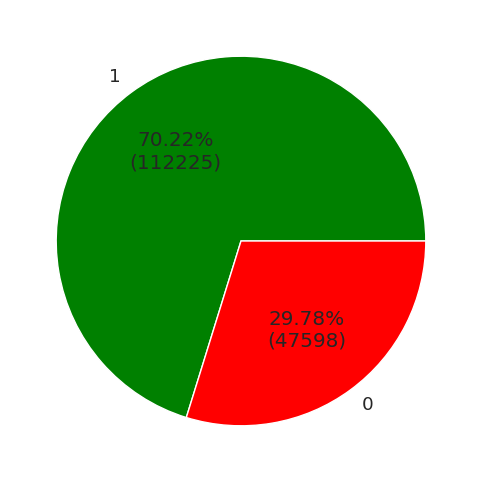

In [ ]:
# Plotting the distribution of positive (1) and negative (1) reviews
plt.figure(figsize=(10,6))

def autopct(vals):
        def format(pct):
            total = sum(vals)
            val = int(round(pct*total/100.00))
            return '{:.2f}%\n({v:d})'.format(pct, v=val)
        return format

size = df['sentiment'].value_counts()

plt.pie(size,labels = size.index, autopct=autopct(size), colors=['green', 'red'])
plt.show()

# Source: https://www.kaggle.com/code/shubhamgadekar/complete-drug-review-analytics/notebook

- **Observation:** The majority of reviews are positive (70.1%), while 29.9% is negative. A dataset with a distribution of 70% positive sentiment and 30% negative sentiment can be considered imbalanced, as there is a significant difference in the number of instances between the two classes. We might consider balancing the two classes in the target feature.

#### New Predictor Variables

In [ ]:
# Word count in each review
df['count_word']=df["review_clean"].apply(lambda x: len(str(x).split()))

# Unique word count
df['count_unique_word']=df["review_clean"].apply(lambda x: len(set(str(x).split())))

# Letter count
df['count_letters']=df["review_clean"].apply(lambda x: len(str(x)))

# Average length of words
df["mean_word_len"] = df["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Punctuation count
df["count_punctuations"] = df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Upper case words count
df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Title case words count
df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Number of stop words
df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [ ]:
# nlp = spacy.load('en_core_web_sm')

# def extract_entities(text):
#     doc = nlp(text)
#     drugs = []
#     side_effects = []
#     for ent in doc.ents:
#         if ent.label_ == 'DRUG':
#             drugs.append(ent.text)
#         elif ent.label_ == 'SIDE_EFFECT':
#             side_effects.append(ent.text)
#     return drugs, side_effects

# df[['drugs', 'side_effects']] = df['review'].apply(lambda x: pd.Series(extract_entities(x)))

KeyboardInterrupt: ignored

### Target and Predictor variables - X & y

#### Sample for test - temp

In [ ]:
# Sample 20,000 instances
sample_df = df.sample(n=20000, random_state=42)

# Save the sampled dataset
sample_df.to_csv('sampled_drug_review_dataset.csv', index=False)

df = pd.read_csv('sampled_drug_review_dataset.csv')

In [ ]:
## Declaring X and y

# Feature matrix
X = df[['drugName_encoded','condition_encoded', 'usefulCount','day', 'month', 'year','review_stemmed_nostop',
                   'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]
# Target variable
y = df['sentiment']

### Train-test-val split

- Training set is used to train a selection of candidate models
- Validation set is used to evaluate the candidate models
- The best performing of the candidates is chosen
- The chosen model is trained on a new training set (train + val)
- The trained model is evaluated with the test dataset

In [ ]:
## Train test split 
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
# print ("The Train set size ", X_train.shape)
# print ("The Test set size ", X_test.shape)

The Train set size  (15000, 15)
The Test set size  (5000, 15)


In [ ]:
## Train val test split 

# Initial train-test split (80% train, 20% test)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print ("The train-val set size ", X_trainval.shape)
print ("The test set size ", X_test.shape)

The train-val set size  (16000, 15)
The test set size  (4000, 15)


In [ ]:
# Second train-val split on remaining 80% of data to get validation set (60% train, 20% validation)
# Stratify parameter is set to y_train to ensure that  class distribution is preserved in both training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

print ("The train set size ", X_train.shape)
print ("The validation set size ", X_val.shape)

The train set size  (12000, 15)
The validation set size  (4000, 15)


In [ ]:
# Print the distribution of target variable classes
print(y.value_counts())

1    14024
0     5976
Name: sentiment, dtype: int64


In [ ]:
14024/5976

2.3467202141900936

# Modeling

Use 
Dummy
Naive Bayes
Logistic Regression
RFE (feature selection)


BERT

### Balancing dataset - Undersampling

In [ ]:
# Print class distribution of target variable
print(y_train.value_counts())

1    8414
0    3586
Name: sentiment, dtype: int64


In [ ]:
8414/3586

2.3463469046291134

In [ ]:
# Balancing dataset

# create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# fit and apply the sampler to the training data
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

NameError: ignored

In [ ]:
# Print the distribution of target variable classes
print(y_train_balanced.value_counts())

0    3586
1    3586
Name: sentiment, dtype: int64


## Functions for modeling

### Initial pipeline

In [ ]:
## Defining function for training model
# The function evaluates a given model on a dataset and returns the test and train scores 

def model_pipeline(model, text_processor=None, num_processor=None,_X_train = X_train, _X_test = X_test, _y_train = y_train, _y_test = y_test):
    # Define column transformer to handle different types of features
    num_features = ['drugName_encoded','condition_encoded', 'usefulCount','day', 'month', 'year',
                    'count_word', 'count_unique_word', 'count_letters',
                    'count_punctuations', 'count_words_upper', 'count_words_title',
                    'count_stopwords', 'mean_word_len']

    # Create empty list to hold transformers for the ColumnTransformer
    preprocessor_transformers = []

    # If a numerical data transformer is provided, append it to the list
    if num_processor:
        preprocessor_transformers.append(('num', num_processor, num_features))

    # If a text data transformer is provided, append it to the list
    if text_processor:
        preprocessor_transformers.append(('text', text_processor, 'review_stemmed_nostop'))

    # If there are any transformers in the list, create a ColumnTransformer with those transformers, otherwise set preprocessing to None
    preprocessor = ColumnTransformer(preprocessor_transformers) if preprocessor_transformers else None

    # Define the pipeline with the desired preprocessing steps and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model),
        ])

    # Train model - fit pipeline to training set
    pipeline.fit(_X_train, _y_train)

    #  Predict y in test set
    y_pred = pipeline.predict(X_test)
    # Evaluate the model on the test and training data u
    train_score = pipeline.score(_X_train, _y_train)
    test_score = pipeline.score(_X_test, _y_test)
    cm = confusion_matrix(y_test, y_pred)

    # Print the accuracies
    print(f'Train score: {train_score:.4f}')
    print(f'Test score: {test_score:.4f}\n')
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(cm)
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Return the test and train accuracies
    return (test_score, train_score, y_pred)

### Hyperparameter Tuning - GridsearchCV

In [ ]:
## Defining funciton for hyper parameter tuning
# The function that evaluates a given model on a dataset and returns the test and train scores 
# GridSearchCV is implemented to find the optimal hyperparameters

def tune_model(model, metric, param_grid, text_processor=None, num_processor=None, _X_train = X_train, _X_test = X_test, _y_train = y_train, _y_test = y_test):
    # Define column transformer to handle different types of features
    num_features = ['drugName_encoded','condition_encoded', 'usefulCount','day', 'month', 'year',
                    'count_word', 'count_unique_word', 'count_letters',
                    'count_punctuations', 'count_words_upper', 'count_words_title',
                    'count_stopwords', 'mean_word_len']
    txt_featues = 'review_stemmed_nostop'

    # Create empty list to hold transformers for the ColumnTransformer
    preprocessor_transformers = []

    # If a numerical data transformer is provided, append it to the list
    if num_processor:
        preprocessor_transformers.append(('num', num_processor, num_features))

    # If a text data transformer is provided, append it to the list
    if text_processor:
        preprocessor_transformers.append(('text', text_processor, txt_featues))

    # If there are any transformers in the list, create a ColumnTransformer with those transformers, otherwise set preprocessing to None
    preprocessor = ColumnTransformer(preprocessor_transformers) if preprocessor_transformers else None

    # Define the pipeline with the desired preprocessing steps and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model),
        ])

    # Use GridSearchCV to find the best hyperparameters for the model
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring=metric)
    grid_search.fit(_X_train, _y_train)
    
    # Print the name of the model and the best hyperparameters
    print("Best hyperparameters:\n", grid_search.best_params_)
    print(f"\nMean cross-validated score of the best estimator: {grid_search.best_score_:.4f}\n")
    
    #  Predict y in test set
    y_pred = grid_search.predict(X_test)
    # Evaluate the model on the test and training data u
    train_score = grid_search.score(_X_train, _y_train)
    test_score = grid_search.score(_X_test, _y_test)
    cm = confusion_matrix(y_test, y_pred)

    # Print the accuracies
    print(f'\nTrain score: {train_score:.4f}')
    print(f'Test score: {test_score:.4f}\n')
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(cm)
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Return the test and train accuracies
    return (test_score, train_score, y_pred, grid_search)

## Baseline Model - Dummy Classifier

### Initial model

Train score: 0.5000
Test score: 0.2988

Classification Report:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46      1195
           1       0.00      0.00      0.00      2805

    accuracy                           0.30      4000
   macro avg       0.15      0.50      0.23      4000
weighted avg       0.09      0.30      0.14      4000

Confusion Matrix:
[[1195    0]
 [2805    0]]


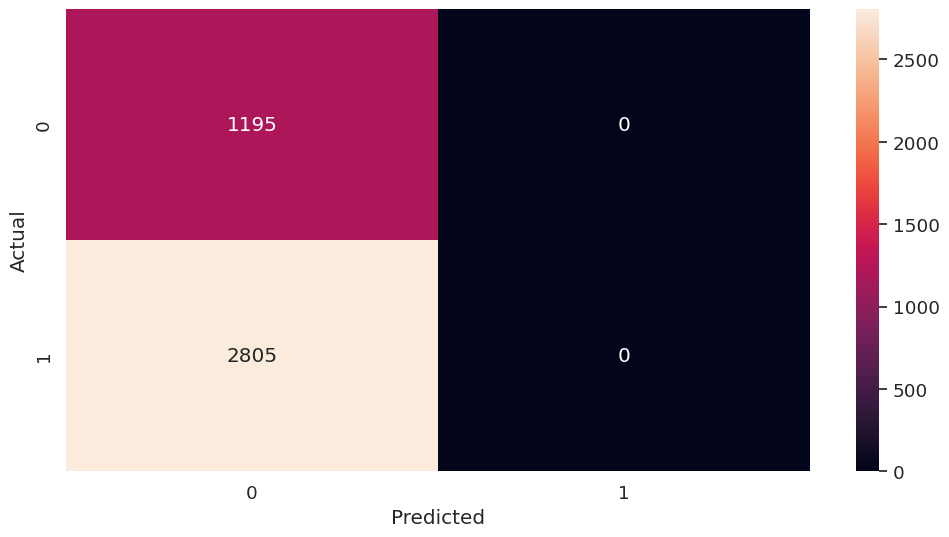

In [ ]:
## Initial model

# Defining model
model_dummy = DummyClassifier()

# Using model_pipeline function to fit model to train set
# test_score_dummy, train_score_dummy, y_pred_dummy = model_pipeline(model_dummy, _X_train=X_train_balanced, _X_test=X_test, _y_train=y_train_balanced, _y_test=y_test)
test_score_dummy, train_score_dummy, y_pred_dummy = model_pipeline(model_dummy, _X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)


### Hyperparameter Tuning

Best hyperparameters:
 {'classifier__strategy': 'most_frequent'}

Mean cross-validated score of the best estimator: 0.8243


Train score: 0.8243
Test score: 0.8244

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1195
           1       0.70      1.00      0.82      2805

    accuracy                           0.70      4000
   macro avg       0.35      0.50      0.41      4000
weighted avg       0.49      0.70      0.58      4000

Confusion Matrix:
[[   0 1195]
 [   0 2805]]


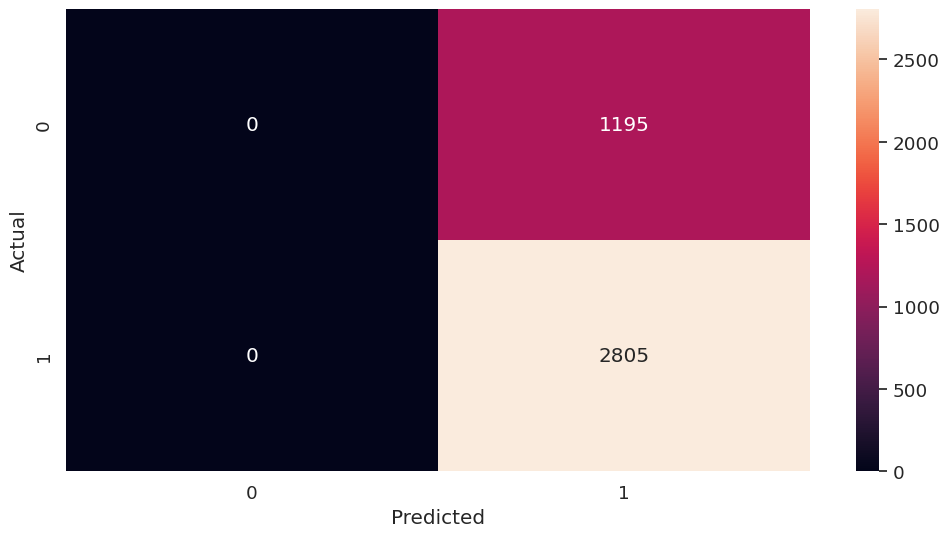

In [ ]:
## Testing on imbalanced dataset

# Define hyperparameters to test
params_dummy = {
    #'preprocessor__text__ngram_range': [(1,2), (1,3), (1,4)],
    'classifier__strategy': ['stratified', 'most_frequent']
}

# Metric used for training model performance
metric = 'f1'

test_score, train_score, y_pred, grid_search_dummy = tune_model(model_dummy, metric, params_dummy, _X_train=X_train, _X_test=X_val, _y_train=y_train, _y_test=y_val)

Best hyperparameters:
 {'classifier__strategy': 'stratified'}

Mean cross-validated score of the best estimator: 0.5101


Train score: 0.4898
Test score: 0.5893

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.49      0.36      1195
           1       0.69      0.49      0.57      2805

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.47      4000
weighted avg       0.57      0.49      0.51      4000

Confusion Matrix:
[[ 582  613]
 [1435 1370]]


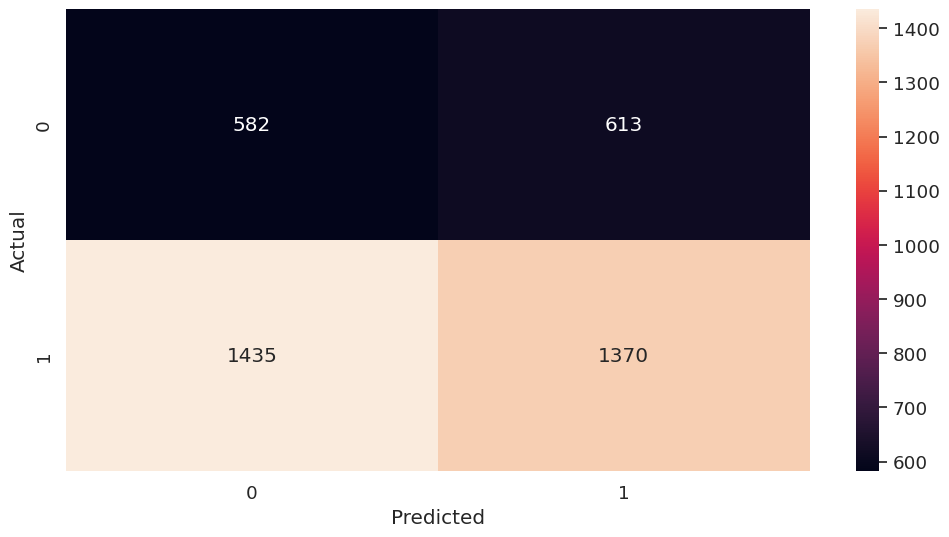

In [ ]:
## Testing on balanced dataset

# Define hyperparameters to test
params_dummy = {
    #'preprocessor__text__ngram_range': [(1,2), (1,3), (1,4)],
    'classifier__strategy': ['stratified', 'most_frequent']
}
# Metric used for training model performance
metric = 'f1'

test_score, train_score, y_pred, grid_search_dummy = tune_model(model_dummy, metric, params_dummy, _X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

## Naive Bayes

### Initial Model

Train score: 0.8554
Test score: 0.7325

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.77      0.62      1195
           1       0.88      0.70      0.78      2805

    accuracy                           0.72      4000
   macro avg       0.70      0.74      0.70      4000
weighted avg       0.77      0.72      0.73      4000

Confusion Matrix:
[[ 922  273]
 [ 839 1966]]


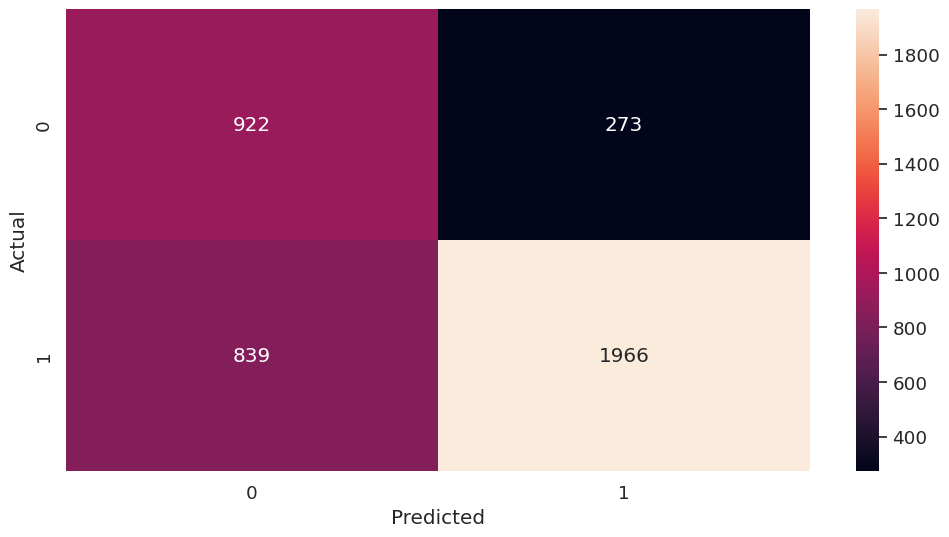

In [ ]:
## Initial model

# Defining model
model_nb= MultinomialNB()

# Processing 
text_proc_nb = TfidfVectorizer(sublinear_tf=True)
num_proc_nb = MinMaxScaler()

# Using model_pipeline function to fit model to train set
test_score_nb, train_score_nb, y_pred_nb = model_pipeline(model_nb, text_proc_nb, num_proc_nb,_X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

### Hyperparameter Tuning

Best hyperparameters:
 {'classifier__alpha': 1.0, 'preprocessor__text__ngram_range': (1, 3)}

Mean cross-validated score of the best estimator: 0.7743


Train score: 0.9986
Test score: 0.8157

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67      1195
           1       0.91      0.73      0.81      2805

    accuracy                           0.76      4000
   macro avg       0.74      0.78      0.74      4000
weighted avg       0.80      0.76      0.77      4000

Confusion Matrix:
[[ 985  210]
 [ 759 2046]]


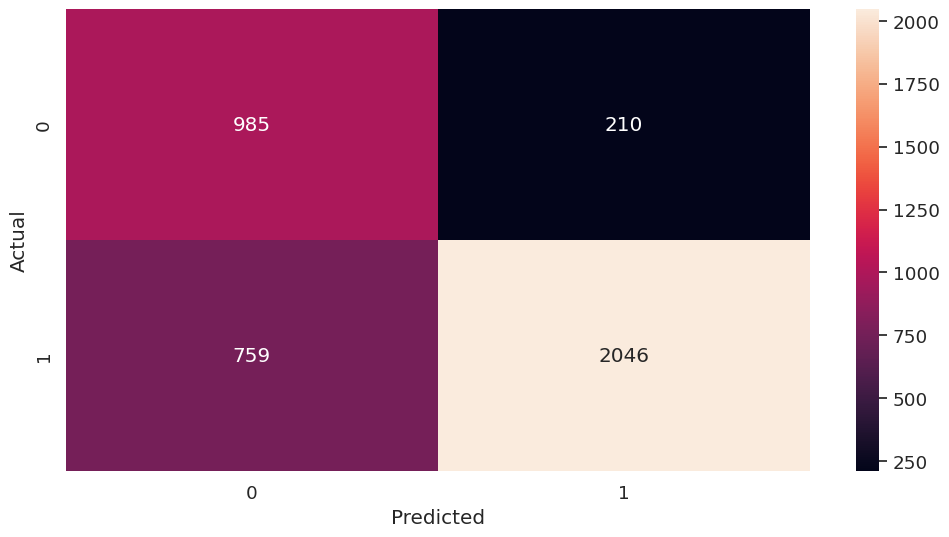

In [ ]:
## Using balanced dataset

# Define hyperparameters to test
params_nb = {
    'preprocessor__text__ngram_range': [(1,2), (1,3), (1,4), (2,2)],
    'classifier__alpha': [0.01, 0.1, 1.0]
}

# Metric used for training model performance
metric = 'f1'

test_score_nb, train_score_nb, y_pred_nb, grid_search_nb = tune_model(model_nb, metric, params_nb, text_proc_nb, num_proc_nb, _X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

## Logistic Regression

### Initial Model

Train score: 0.8696
Test score: 0.7823

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.76      0.66      1195
           1       0.89      0.77      0.82      2805

    accuracy                           0.77      4000
   macro avg       0.74      0.77      0.74      4000
weighted avg       0.80      0.77      0.78      4000

Confusion Matrix:
[[ 914  281]
 [ 641 2164]]


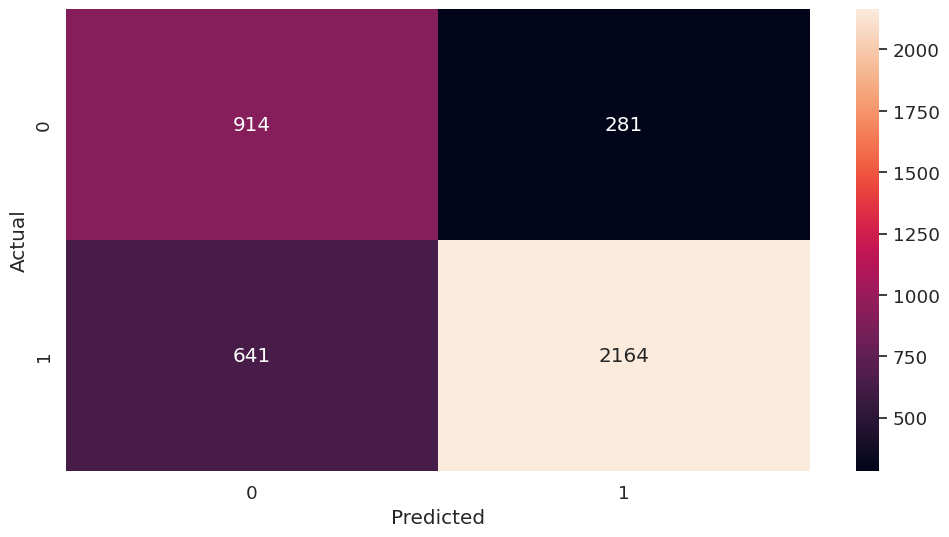

In [ ]:
## Initial model

# Defining model
model_lr= LogisticRegression(max_iter=1000)

# Processing 
text_proc_lr = TfidfVectorizer()
num_proc_lr = StandardScaler()

# Using model_pipeline function to fit model to train set
test_score_lr, train_score_lr, y_pred_lr = model_pipeline(model_lr, text_proc_lr, num_proc_lr,_X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

### Hyperparameter Tuning

Best hyperparameters:
 {'classifier__C': 10, 'classifier__solver': 'liblinear', 'preprocessor__text__ngram_range': (1, 2)}

Mean cross-validated score of the best estimator: 0.8019


Train score: 0.9996
Test score: 0.8424

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.70      1195
           1       0.91      0.78      0.84      2805

    accuracy                           0.79      4000
   macro avg       0.76      0.79      0.77      4000
weighted avg       0.82      0.79      0.80      4000

Confusion Matrix:
[[ 966  229]
 [ 614 2191]]


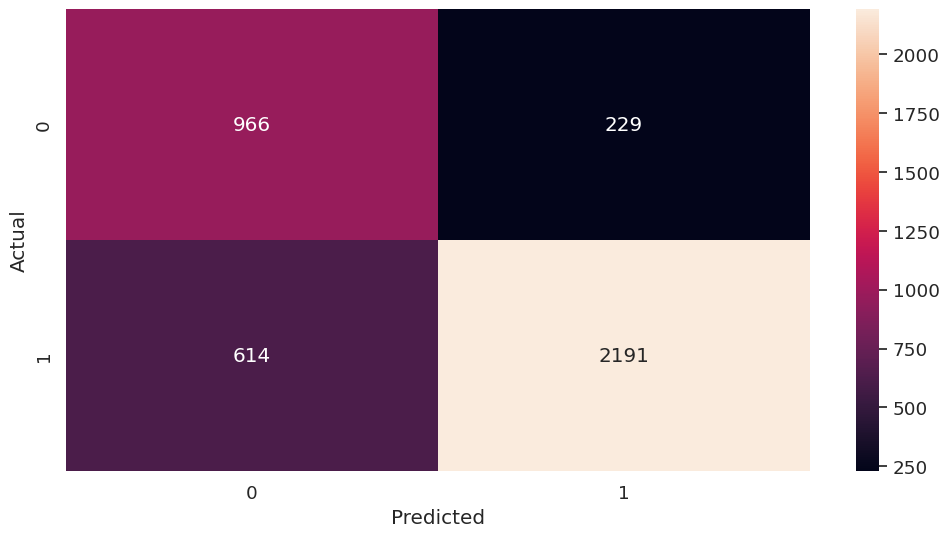

In [ ]:
## Using balanced dataset

# Define hyperparameters to test
params_lr = {
    'preprocessor__text__ngram_range': [(1,2), (1,3), (1,4)],
    'classifier__C': [0.1, 1, 10],
    # 'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    # 'class_weight': [None, 'balanced']
}

# Metric used for training model performance
metric = 'f1'

test_score_lr, train_score_lr, y_pred_lr, grid_search_lr = tune_model(model_lr, metric, params_lr, text_proc_lr, num_proc_lr, _X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

### Feature Importance

In [ ]:
# Get the best estimator from the GridSearchCV object
best_estimator = grid_search_lr.best_estimator_

# Get the coefficients of the Logistic Regression model
coefficients = best_estimator['classifier'].coef_

# Get the feature names from the TF-IDF vectorizer
feature_names = []

preprocessor = best_estimator['preprocessor']
for name, transformer, features in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names'):
        feature_names.extend(transformer.get_feature_names(features))
    else:
        feature_names.extend(features)

# Create a list of (feature_name, coefficient) tuples and sort it by coefficient
feature_importance = sorted(zip(feature_names, coefficients[0]), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for feature, importance in feature_importance[:20]:
    print("{}: {}".format(feature, importance))


Top 10 most important features:
usefulCount: 0.7093954775875321
count_word: 0.7032538734409913
i: 0.20796292204534783
n: 0.18949066946414075
count_unique_word: 0.16614800616567654
count_words_title: 0.15813636534238432
v: 0.14251398258263498
o: 0.12829024871622094
e: 0.07974352704903755
condition_encoded: 0.07341008562403994
d: 0.06239558735886109
count_words_upper: 0.03499041373271336
s: 0.02574375736078454
t: 0.02574375736078454
w: 0.015116363426284245
count_punctuations: 0.007475537689693835
day: -0.0020374996166568284
drugName_encoded: -0.004688927814644174
p: -0.020142727630661942
mean_word_len: -0.0668337396884711


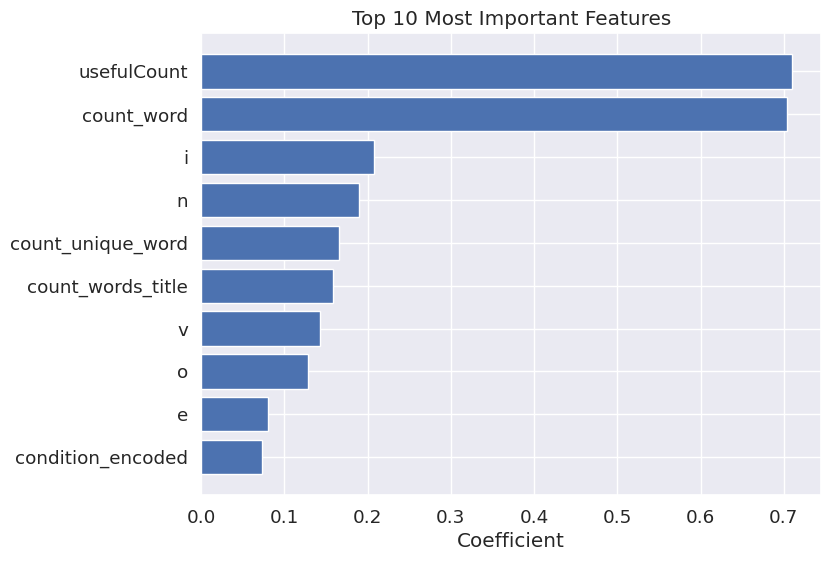

In [ ]:
# Get the top 10 most important features and their coefficients
top_features = feature_importance[:10]
features, importances = zip(*top_features)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(features)), importances, align='center')
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)
ax.invert_yaxis()  # invert the y-axis to show the most important feature on top
ax.set_xlabel('Coefficient')
ax.set_title('Top 10 Most Important Features')

plt.show()


## Random Forest

### Initial Model

Train score: 1.0000
Test score: 0.7638

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.66      1195
           1       0.89      0.75      0.82      2805

    accuracy                           0.76      4000
   macro avg       0.73      0.77      0.74      4000
weighted avg       0.80      0.76      0.77      4000

Confusion Matrix:
[[ 932  263]
 [ 688 2117]]


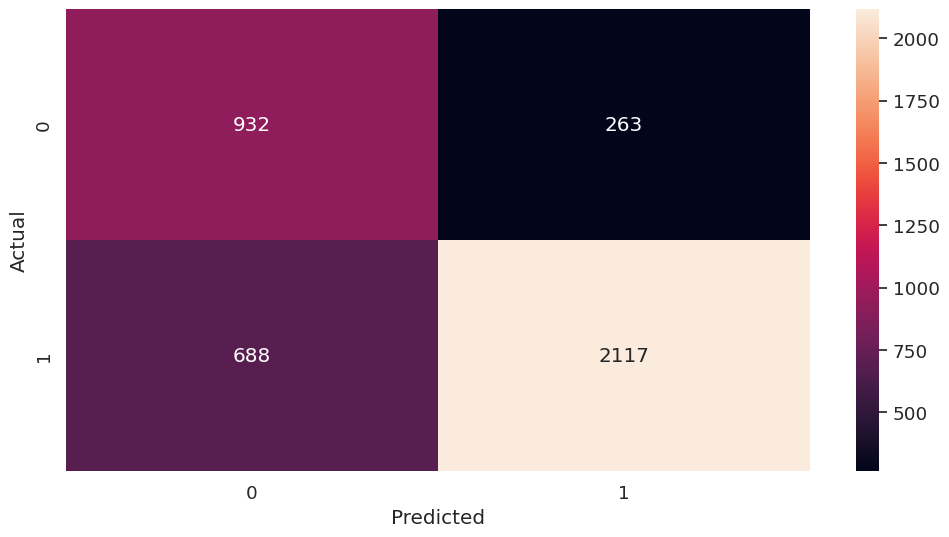

In [ ]:
## Initial model

# Defining model
model_rfc= RandomForestClassifier(random_state=42)

# Processing 
text_proc_rfc = TfidfVectorizer()
num_proc_rfc = StandardScaler()

# Using model_pipeline function to fit model to train set
test_score_rfc, train_score_rfc, y_pred_rfc = model_pipeline(model_rfc, text_proc_rfc, num_proc_rfc,_X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

### Hyperparameter Tuning

In [ ]:
## Using balanced dataset

# Define hyperparameters to test
params_rfc = {
    'preprocessor__text__ngram_range': [(1,2), (1,3), (1,4)],
    'classifier__n_estimators': [5, 10, 20],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 4, 6],
    'classifier__min_samples_leaf': [1, 2, 4],
    #'classifier__max_features': ['sqrt', 'log2']
}

# Metric used for training model performance
metric = 'f1'

test_score_rfc, train_score_rfc, y_pred_rfc, grid_search_rfc = tune_model(model_rfc, metric, params_rfc, text_proc_rfc, num_proc_rfc, _X_train=X_train_balanced, _X_test=X_val, _y_train=y_train_balanced, _y_test=y_val)

### Feature Importance

In [ ]:
# Get the feature importances of the best estimator
best_rfc = grid_search_rfc.best_estimator_
feature_importances = best_rfc.feature_importances_

In [ ]:
# Plot the feature importances
n_features = X_train_balanced.shape[1]  # number of features
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=feature_importances, y=X_train_balanced.columns, ax=ax)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## SVM

## BERT

### X and y

- BERT is a pretrained large-language model and needs differetn preprocessing techniques than the other candidate models. 
    - Does not need encoding of categorical features
    - Takes raw text as input (the cleaned review)

In [ ]:
# Feature matrix - 2 cat, 4 num, 1 txt 
X_bert = df[['drugName','condition', 'usefulCount','day', 'month', 'year','review_clean']]
# ## TEXT ONLY
#X_bert = df[['review_clean']]
# Target variable
y_bert = df['sentiment']

### Train test split

In [ ]:
# Splitting data to use with BERT
X_trainval_bert, X_test_bert, y_trainval_bert, y_test_bert = train_test_split(X_bert, y_bert, test_size=0.2, random_state=42, stratify=y_bert)

print("The train-val set size: ", X_trainval_bert.shape)
print("The test set size: ", X_test_bert.shape)

The train-val set size:  (16000, 7)
The test set size:  (4000, 7)


In [ ]:
# Second train-val split on remaining 80% of data to get validation set (60% train, 20% validation)
# Stratify parameter is set to y_train to ensure that class distribution is preserved in both training and validation sets.
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_trainval_bert, y_trainval_bert, test_size=0.25, random_state=42, stratify=y_trainval_bert)

print("The train set size: ", X_train_bert.shape)
print("The validation set size: ", X_val_bert.shape)

The train set size:  (12000, 7)
The validation set size:  (4000, 7)


### Balancing training set

In [ ]:
# Undersampling training set
# create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_bert_balanced, y_train_bert_balanced = rus.fit_resample(X_train_bert, y_train_bert)

In [ ]:
# Import necessary libraries from Tensorflow
# Load BERT preprocessing and encoding layer
bert_prep = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3') 
bert_enc = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4') # a part of bert_model

bert_model = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3')



In [ ]:
## Bruges ikke?
# Creating function to create word Embeddings 
def get_sentence_embeding(sentences):
    
    prep_txt = bert_prep(sentences)
    return bert_enc(prep_txt)

In [ ]:
## TEXT ONLY
# Define input layer for text
txt_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

# Preprocess input text using BERT preprocess layer
txt_prep = bert_prep(txt_input)

# Encode preprocessed text using BERT encoder layer
output = bert_enc(txt_prep)

# Define dropout and output layers for NN
dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout')(output['pooled_output'])
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(dropout_layer)

# Combine all layers to create the final model
model_final = tf.keras.Model(inputs=[txt_input], outputs=[output_layer])

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, concatenate

# # Define input layers
# text_input = Input(shape=(None,), dtype=tf.string, name='text_input')
# numeric_input = Input(shape=(6,), name='numeric_input') # assuming 4 numeric features

# # Define embedding layer for text input
# embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(text_input)

# # Define dense layer for numerical input
# dense_layer = Dense(8, activation='relu')(numeric_input)

# # Concatenate the two layers
# concat_layer = concatenate([embedding_layer, dense_layer])

# # Define output layer
# output_layer = Dense(1, activation='sigmoid')(concat_layer)

# # Define the model
# model = tf.keras.models.Model(inputs=[text_input, numeric_input], outputs=output_layer)



In [ ]:
# ## chatGPT
# # Load BERT model and preprocessing module
# bert_model = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3')
# bert_prep = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

# # Load data
# df = pd.read_csv('reviews.csv')

# # Preprocess categorical features
# cat_cols = ['drugName', 'condition']
# for col in cat_cols:
#     df[col] = pd.Categorical(df[col])
#     df[col] = df[col].cat.codes

# # Preprocess numerical features
# num_cols = ['usefulCount', 'day', 'month', 'year']
# for col in num_cols:
#     df[col] = (df[col] - df[col].mean()) / df[col].std()

# # Concatenate features
# X = df[['drugName', 'condition', 'usefulCount', 'day', 'month', 'year', 'review_clean']]
# y = df['sentiment']

# X_cat = tf.keras.layers.Input(shape=(2,), dtype=tf.int32, name='categorical')
# X_num = tf.keras.layers.Input(shape=(4,), dtype=tf.float32, name='numerical')
# X_text = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

# # Preprocess input text using BERT preprocess layer
# text_prep = bert_prep(X_text)

# # Concatenate categorical, numerical, and text features
# X_cat_emb = tf.keras.layers.Embedding(input_dim=5000, output_dim=10)(X_cat)
# X_cat_flat = tf.keras.layers.Flatten()(X_cat_emb)
# X_num_dense = tf.keras.layers.Dense(10, activation='relu')(X_num)
# X_text_enc = bert_model(text_prep)['pooled_output']
# X_concat = tf.keras.layers.concatenate([X_cat_flat, X_num_dense, X_text_enc], axis=-1)

# # Define dropout and output layers for NN
# dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout')(X_concat)
# output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(dropout_layer)

# # Combine all layers to create the final model
# model = tf.keras.Model(inputs=[X_cat, X_num, X_text], outputs=[output_layer])

# # Compile the model


In [ ]:
# Concatenate features
#X = df[['drugName', 'condition', 'usefulCount', 'day', 'month', 'year', 'review_clean']]
#y = df['sentiment']

cat_input_condition = Input(shape=(1,), dtype=tf.string, name='condition_input')
cat_input_drug = Input(shape=(1,), dtype=tf.string, name='drug_input')
num_input = tf.keras.layers.Input(shape=(4,), dtype=tf.float32, name='numerical')
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

In [ ]:
# preprocess categorical features
   
# create a list of unique conditions and drug names
# unique_conditions = df['condition'].unique().tolist()
# unique_drugNames = df['drugName'].unique().tolist()
vocab_condition = df['condition'].unique().tolist()
vocab_drug = df['drugName'].unique().tolist()

# define categorical feature columns for 'condition' and 'drugName'
# cond_feature_col = tf.feature_column.categorical_column_with_vocabulary_list('condition', unique_conditions)
# drug_feature_col = tf.feature_column.categorical_column_with_vocabulary_list('drugName', unique_drugNames)
cat_condition = categorical_column_with_vocabulary_list(key='condition', vocabulary_list=vocab_condition)
cat_drug = categorical_column_with_vocabulary_list(key='drugName', vocabulary_list=vocab_drug)

# one-hot encode categorical feature columns
# cond_onehot_col = tf.feature_column.indicator_column(cond_feature_col)
# drug_onehot_col = tf.feature_column.indicator_column(drug_feature_col)

# Embedding categorical columns
encoded_condition = embedding_column(cat_condition, dimension=8)
encoded_drug = embedding_column(cat_drug, dimension=16)

# Concatenating categorical colums
cat_cols = [encoded_condition, encoded_drug]


In [ ]:
# Preprocess numerical features (standardScaler)

# StandardScaler object
scaler = StandardScaler()

# Normalize numerical features
num_cols = ['usefulCount', 'day', 'month', 'year']
df[num_cols] = scaler.fit_transform(df[num_cols])
num_cols_scaled = df[num_cols]
# # Scale numerical features
#num_cols_scaled = tf.keras.layers.experimental.preprocessing.Normalization()(num_input)

# function to scale
def num_scale(feature):
  scaler = StandardScaler()
  scaler.fit(train[[feature]])
  def standardize(x):
    return scaler.transform([[x]])[0][0]
  return standardize

In [ ]:
# Preprocess text using BERT preprocess layer
text_prep = bert_prep(text_input)

# Encode text using bert model encoder
text_enc = bert_enc(text_prep)['pooled_output']

In [ ]:
# Concatenating categorical, numerical, and text features

#X_concat = tf.keras.layers.concatenate([X_cat_flat, X_num_dense, X_text_enc], axis=-1)

# Define dropout layer
dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout')(text_enc)
# Concatenating categorical, numerical, and text features
concat_layer = Concatenate()([dropout_layer, num_cols_scaled, encoded_condition, encoded_drug])

# Define output layer for NN
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat_layer)

# Define dropout and output layers for NN - old
# dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout')(X_concat)
# output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(dropout_layer)

# Combine all layers to create the final model
model_bert = tf.keras.Model(inputs=[text_input, num_input, cat_input_condition, cat_input_drug], outputs=[output_layer])

ValueError: ignored

In [ ]:
###############2

# Define the numerical features
num_c = ['usefulCount', 'day', 'month', 'year']

# Define the categorical features
cat_e_c = ['drugName', 'condition']

# Define the text features
text_c = ['review_clean']

# https://medium.com/ml-book/train-tf-keras-model-using-feature-coulmn-8de12e65ddec

In [ ]:
# Define the feature columns for numerical features
num_cols = [tf.feature_column.numeric_column(col) for col in num_c]

# Define the feature columns for categorical features
cat_e_c_vocab = {
    col: list(set(df[col]))
    for col in cat_e_c
}

cat_e_c_cols = [
    tf.feature_column.embedding_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            col, vocabulary_list=cat_e_c_vocab[col]
        ),
        dimension=8
    )
    for col in cat_e_c
]

# Define the feature columns for text features
text_c_cols = [
    tf.feature_column.text_column(col)
    for col in text_c
]

# Combine all the feature columns
feature_cols = num_cols + cat_e_c_cols + text_c_cols

In [ ]:
# Define the input layer for numerical features
num_input = tf.keras.layers.Input(shape=(len(num_c),), dtype=tf.float32, name='numerical')

# Define the input layers for categorical features
cat_input_condition = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name='condition_input')
cat_input_drug = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name='drug_input')

# Define the input layers for text features
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')


In [ ]:
# Define the preprocessing layers for numerical features
standardization_layer = tf.keras.layers.experimental.preprocessing.Normalization()
standardization_layer.adapt(df[num_c])

# Define the preprocessing layers for categorical features
condition_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=cat_e_c_vocab['condition'], mask_token=None
)
drug_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=cat_e_c_vocab['drugName'], mask_token=None
)
condition_embedding = tf.keras.layers.Embedding(len(cat_e_c_vocab['condition']) + 1, 8)
drug_embedding = tf.keras.layers.Embedding(len(cat_e_c_vocab['drugName']) + 1, 8)

# Define the preprocessing layers for text features
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3', trainable=False)


In [ ]:
# Preprocess the numerical features
num_cols_scaled = standardization_layer(num_input)

# Preprocess the categorical features
encoded_condition = condition_embedding(condition_lookup(cat_input_condition))
encoded_drug = drug_embedding(drug_lookup(cat_input_drug))

# Preprocess the text features
text_prep = bert_layer(text_input)
text_enc = text_prep['pooled_output']
dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout')(text_enc)

In [ ]:
# Concatenate the input layers
concat_layer = tf.keras.layers.Concatenate()([
    num_cols_scaled,
    encoded_condition,
    encoded_drug,
    dropout_layer
])

In [ ]:
# Define the output layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat_layer)

In [ ]:
# Define the model
model_bert = tf.keras.Model(
    inputs=[
        num_input,
        cat_input_condition,
        cat_input_drug,
        text_input
    ],
    outputs=output_layer
)

In [ ]:
# Print summary representation of the NN model
model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
# Define metrics to use during training and evaluation
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),           # Accuracy metric
    tf.keras.metrics.Precision(name='precision'),               # Precision metric
    tf.keras.metrics.Recall(name='recall'),                     # Recall metric
    #tf.keras.metrics.F1Score(name='f1_score', num_classes=1)    # f1 metric
]

# Compile the final model with the Adam optimizer, binary crossentropy loss, and the metrics defined above
model_bert.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=METRICS)


In [ ]:
# Fit the model on the training set
model_final.fit(X_train_bert_balanced, y_train_bert_balanced, epochs=4)

Epoch 1/4
225/225 [==============================] - 93s 347ms/step - loss: 0.7031 - accuracy: 0.5187 - precision: 0.5189 - recall: 0.5128
Epoch 2/4
225/225 [==============================] - 78s 346ms/step - loss: 0.6840 - accuracy: 0.5636 - precision: 0.5637 - recall: 0.5630
Epoch 3/4
225/225 [==============================] - 78s 346ms/step - loss: 0.6698 - accuracy: 0.5883 - precision: 0.5871 - recall: 0.5951
Epoch 4/4
225/225 [==============================] - 78s 345ms/step - loss: 0.6550 - accuracy: 0.6148 - precision: 0.6153 - recall: 0.6124


In [ ]:
# Evaluate the final model on the validation set
model_bert.evaluate(X_val_bert, y_val_bert)

125/125 [==============================] - 48s 373ms/step - loss: 0.6220 - accuracy: 0.6935 - precision: 0.8137 - recall: 0.7301


[0.6219843626022339,
 0.6934999823570251,
 0.8136670589447021,
 0.7301247715950012]

In [ ]:
# Predict the sentiment for the validation set using the final BERT model
y_pred_bert = model_bert.predict(X_val_bert)

# Flatten the predicted sentiment values to a 1D array
y_pred_bert = y_pred_bert.flatten()

125/125 [==============================] - 44s 352ms/step


In [ ]:
# Convert predicted probabilities to binary predictions
y_pred_bert = np.where(y_pred_bert > 0.5, 1, 0)

# Print the binary predictions
print(y_pred_bert)

[1 1 0 ... 1 1 1]


In [ ]:
# Print confusion matrix for bert
cm_bert = confusion_matrix(y_val_bert, y_pred_bert)
print(cm_bert)

[[ 726  469]
 [ 757 2048]]


Text(50.722222222222214, 0.5, 'Actual')

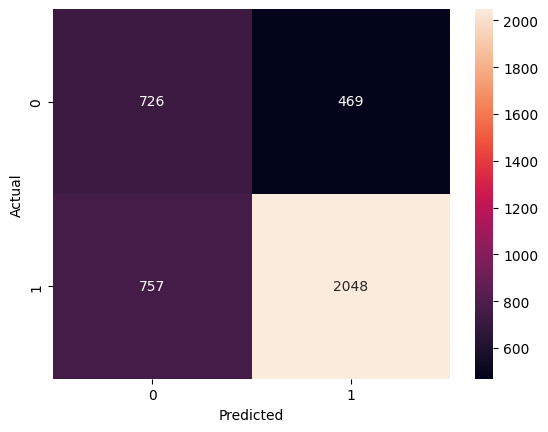

In [ ]:
sns.heatmap(cm_bert, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Evaluation

Make an array with the results and print
Make confusion matrix from BDM

In [ ]:
# Creating dynamic function to visualize ROC curve for the models
def plot_roc(y_val, y_pred, model):
    fpr, tpr, threshold = roc_curve(y_val, y_pred)
    auc = auc(fpr, tpr)
    plt.figure(figsize = (5, 5), dpi = 100)
    plt.plot(fpr, tpr, linestyle='-', label ="{model}(auc = %0.3f)" % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [ ]:
plot_roc(y_val, y_pred_dummy, "Dummy Classifier")

NameError: name 'roc_curve' is not defined

In [ ]:
# Plotting ROC curve for the models

# dummy
fpr_dummy, tpr_dummy, threshold_dummy = roc_curve(y_val, y_pred_dummy)
auc_dummy = auc(fpr_dummy, tpr_dummy)

# naive bayes
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_val, y_pred_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# logistic regression 
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_val, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# bert
fpr_bert, tpr_bert, threshold_bert = roc_curve(y_val_bert, y_pred_bert)
auc_bert = auc(fpr_bert, tpr_bert)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label ="Naive Bayes (auc = %0.3f)" % auc_nb)
plt.plot(bert_fpr, bert_tpr, linestyle='-', label ="BERT (auc = %0.3f)" % auc_bert)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()
plt.show()

In [ ]:
# Creating dynamic functions to visualize scoring-metrics and confusion matrix for all models
labels = np.arange(10)
target_names = list("01")

# Function that creates classification report (recall, precision, f1, and accuracy)
def plot_classification_report(y_test, y_pred, title): 
    clf_report = classification_report(y_test, y_pred, labels=labels, target_names=target_names, output_dict=True)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)

    fig = plt.figure(figsize=(10,5)) # Altering figure for the classification report
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Classification Report", y=1.07, x=0.3)

    plt.subplot(1,2,1) 
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :2].T, annot=True, cmap="Blues", cbar=None,annot_kws={"fontsize":15}) # Including accuracy, recall, and f1-score
    plt.xlabel(("Accuracy: " + str(accuracy)), fontsize=15, labelpad=25)
    plt.show()

# Function that creates confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cf_matrix = confusion_matrix(y_test, y_pred)

    fig = plt.figure(figsize=(10,5)) # Altering figure for the confusion matrices
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Confusion Matrix", y=1.07, x=0.3)

    plt.subplot(1,2,1)
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="d", cbar=None, annot_kws={"fontsize":15})
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)
    plt.show()
    
# Plotting classification report and confusion matrix
plot_classification_report(y_test_cv, y_pred, "Naives Bayes")
plot_confusion_matrix(y_test_cv, y_pred, "Naives Bayes")

plot_classification_report(y_test_bert, y_predicted, "BERT")
plot_confusion_matrix(y_test_bert, y_predicted, "BERT")